# USA Housing
     * Simple Linear Regression
     * Multiple Linear Regression
     * Polinomial Regression
     * Regularization

# Import Library

In [1]:
import numpy as np
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from collections import Counter
random_state = 101

plt.rcParams["figure.figsize"] = (10, 6)

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


# Read Dataset

In [2]:
data = pd.read_csv("USA_Housing.csv")
df = data.copy()
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.459                5.683                      7.009   
1         79248.642                6.003                      6.731   
2         61287.067                5.866                      8.513   
3         63345.240                7.188                      5.587   
4         59982.197                5.041                      7.839   

   Avg. Area Number of Bedrooms  Area Population       Price  \
0                         4.090        23086.801 1059033.558   
1                         3.090        40173.072 1505890.915   
2                         5.130        36882.159 1058987.988   
3                         3.260        34310.243 1260616.807   
4                         4.230        26354.109  630943.489   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

# Data Preparation and Statistical Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.shape

(5000, 7)

In [5]:
df = df.drop("Address", axis = 1)

In [6]:
df.rename(columns = {'Avg. Area Income':"Income",'Avg. Area House Age': "Age", 'Avg. Area Number of Rooms':"Rooms",
           'Avg. Area Number of Bedrooms':"Bedrooms", 'Area Population':"Population"}, inplace = True)
df.head()

Income   Age  Rooms  Bedrooms  Population       Price
0 79545.459 5.683  7.009     4.090   23086.801 1059033.558
1 79248.642 6.003  6.731     3.090   40173.072 1505890.915
2 61287.067 5.866  8.513     5.130   36882.159 1058987.988
3 63345.240 7.188  5.587     3.260   34310.243 1260616.807
4 59982.197 5.041  7.839     4.230   26354.109  630943.489

In [7]:
df.describe().T

count        mean        std       min        25%         50%  \
Income     5000.000   68583.109  10657.991 17796.631  61480.562   68804.286   
Age        5000.000       5.977      0.991     2.644      5.322       5.970   
Rooms      5000.000       6.988      1.006     3.236      6.299       7.003   
Bedrooms   5000.000       3.981      1.234     2.000      3.140       4.050   
Population 5000.000   36163.516   9925.650   172.611  29403.929   36199.407   
Price      5000.000 1232072.654 353117.627 15938.658 997577.135 1232669.378   

                   75%         max  
Income       75783.339  107701.748  
Age              6.651       9.519  
Rooms            7.666      10.760  
Bedrooms         4.490       6.500  
Population   42861.291   69621.713  
Price      1471210.204 2469065.594

In [8]:
df.corr()

Income    Age  Rooms  Bedrooms  Population  Price
Income       1.000 -0.002 -0.011     0.020      -0.016  0.640
Age         -0.002  1.000 -0.009     0.006      -0.019  0.453
Rooms       -0.011 -0.009  1.000     0.463       0.002  0.336
Bedrooms     0.020  0.006  0.463     1.000      -0.022  0.171
Population  -0.016 -0.019  0.002    -0.022       1.000  0.409
Price        0.640  0.453  0.336     0.171       0.409  1.000

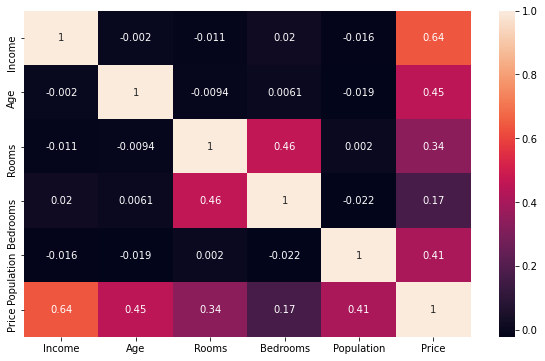

In [9]:
sns.heatmap(df.corr(), annot = True);

In [10]:
corr = df.corr().Price
corr[np.argsort(corr, axis= 0)[:-1]]

Bedrooms     0.171
Rooms        0.336
Population   0.409
Age          0.453
Income       0.640
Name: Price, dtype: float64

In [11]:
df.head()

Income   Age  Rooms  Bedrooms  Population       Price
0 79545.459 5.683  7.009     4.090   23086.801 1059033.558
1 79248.642 6.003  6.731     3.090   40173.072 1505890.915
2 61287.067 5.866  8.513     5.130   36882.159 1058987.988
3 63345.240 7.188  5.587     3.260   34310.243 1260616.807
4 59982.197 5.041  7.839     4.230   26354.109  630943.489

In [12]:
#!pip install hvplot

In [13]:
df.hvplot.hist(by='Price', subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [Population]   (Population_count)

In [14]:
def check_dist(df, var):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 5, 1)
    sns.histplot(x=var, data=df)
    plt.title("histplot")
    plt.subplot(1, 5, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.subplot(1, 5, 3)    
    sns.scatterplot(x = df[var], y = "Price", data = df)
    plt.title("scatterplot")
    plt.subplot(1, 5, 4)     
    sns.regplot(x = df[var], y = "Price", data = df)
    plt.title("regplot")
    plt.show()

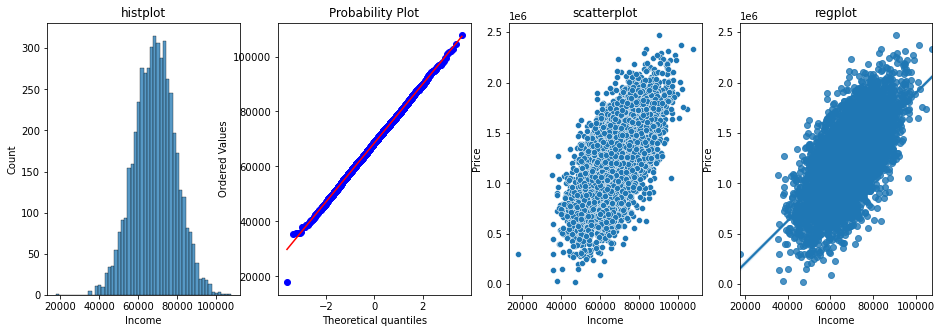

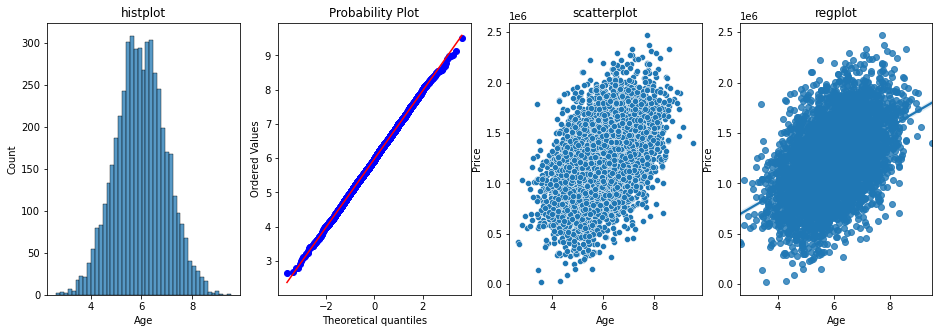

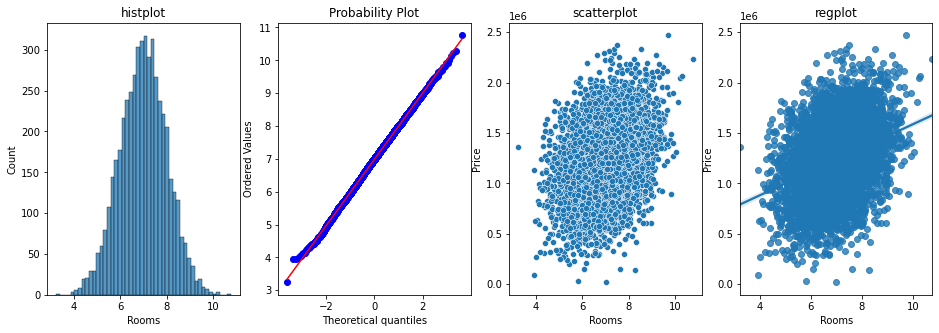

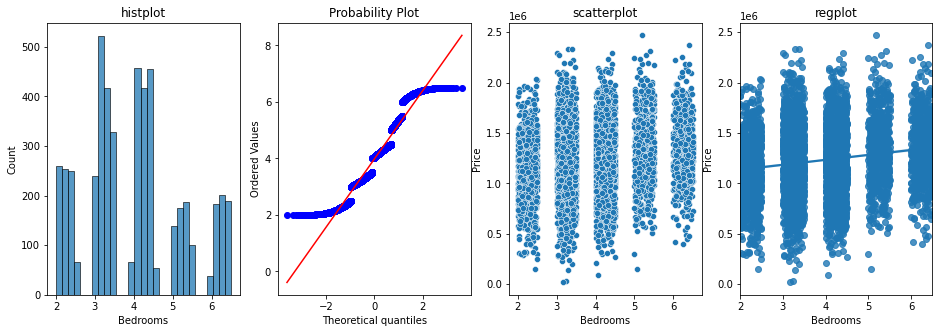

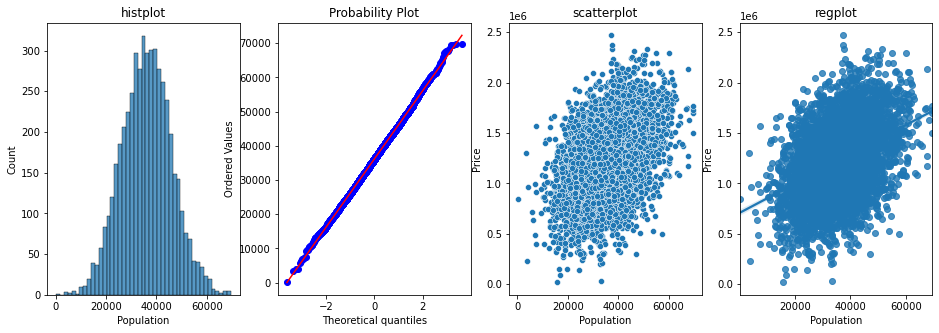

In [15]:
for col in df.drop("Price", axis=1).columns:
    check_dist(df, col)

In [16]:
df[["Income","Price"]]

Income       Price
0    79545.459 1059033.558
1    79248.642 1505890.915
2    61287.067 1058987.988
3    63345.240 1260616.807
4    59982.197  630943.489
...        ...         ...
4995 60567.944 1060193.786
4996 78491.275 1482617.729
4997 63390.687 1030729.583
4998 68001.331 1198656.872
4999 65510.582 1298950.480

[5000 rows x 2 columns]

In [17]:
corr = df.Price.corr(df.Income)
corr

0.639733778249894

In [18]:
R2_score = corr**2
R2_score

0.4092593070338845

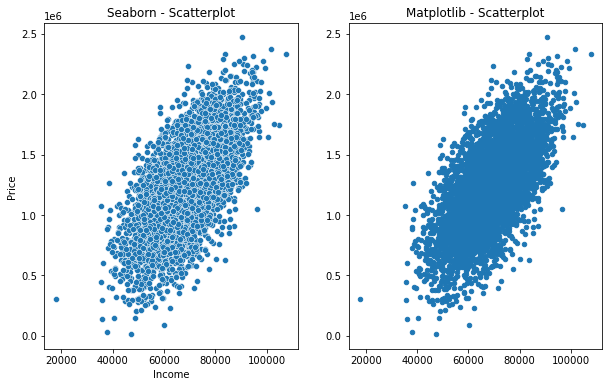

In [19]:
plt.subplot(1, 2, 1)
sns.scatterplot(x= df.Income, y=df.Price, data = df);
plt.title("Seaborn - Scatterplot")
plt.subplot(1, 2, 2)
plt.scatter(x= df.Income, y=df.Price, s =20);
plt.title("Matplotlib - Scatterplot")
plt.show()

# Visualizations

In [20]:
from scipy.stats import skew

In [21]:
for i in df.drop(columns= "Price").columns:
    print(i, skew(df[i]))

Income -0.03370985856853668
Age -0.007211708023735578
Rooms -0.040983610381965664
Bedrooms 0.37612751568905145
Population 0.05063448536127159


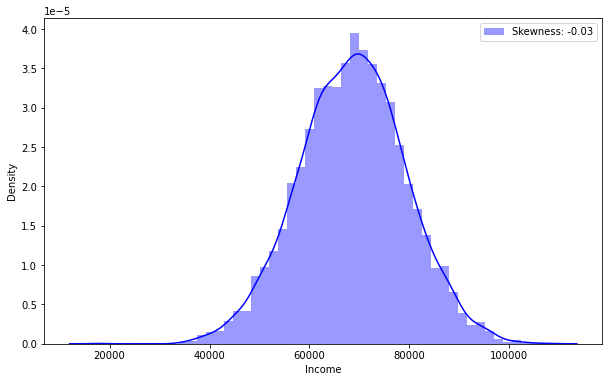

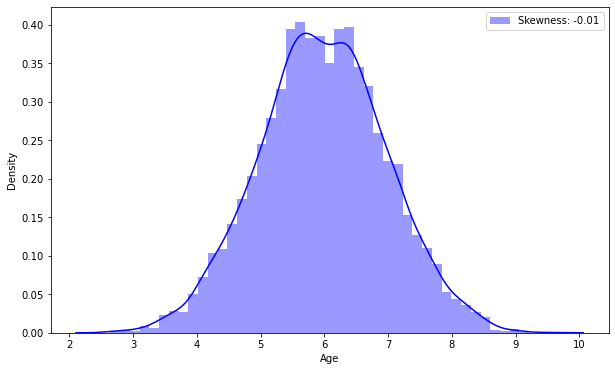

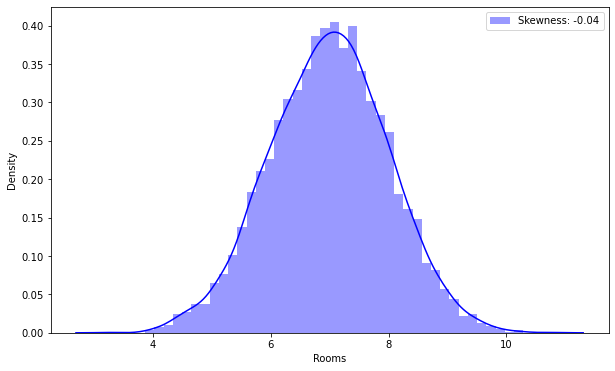

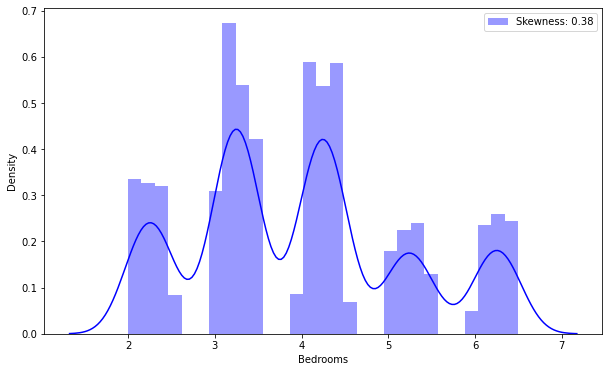

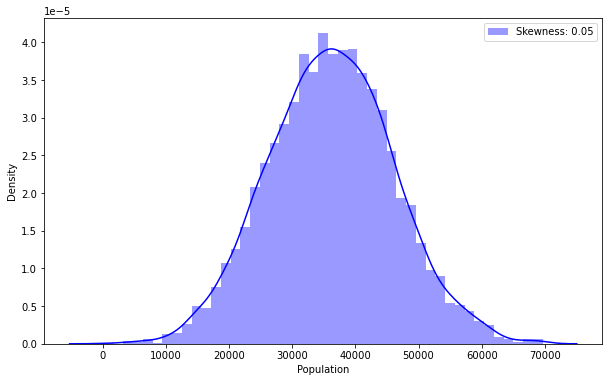

In [22]:
for j in df.drop(columns= "Price").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness: %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

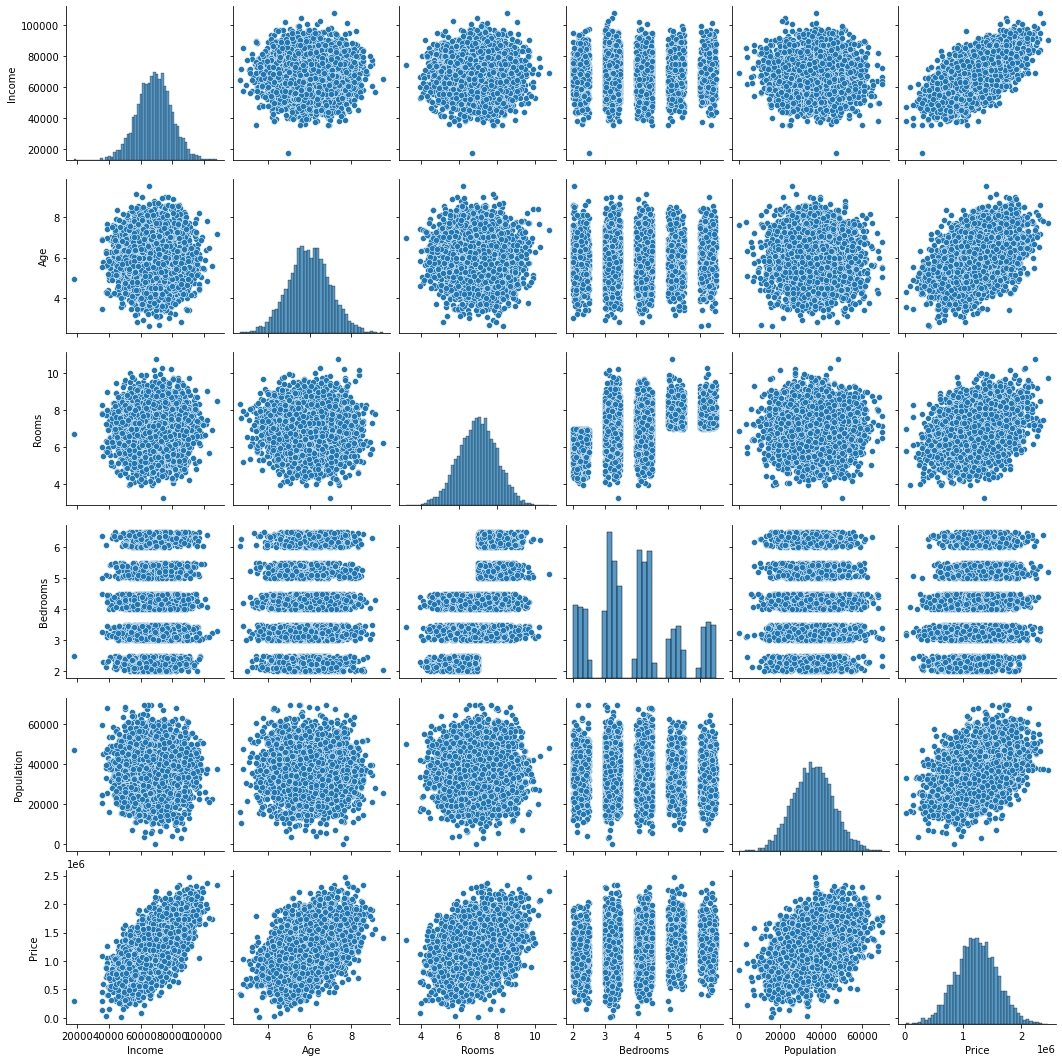

In [23]:
sns.pairplot(df)

# Simple Linear Regression

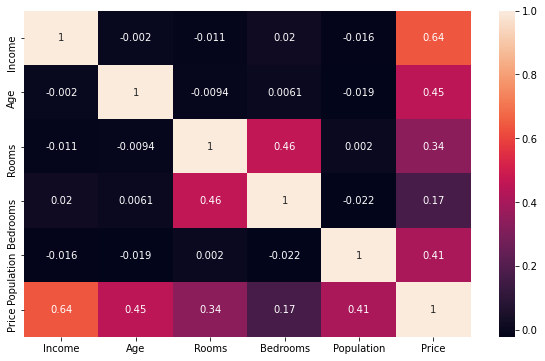

In [24]:
sns.heatmap(df.corr(), annot= True);

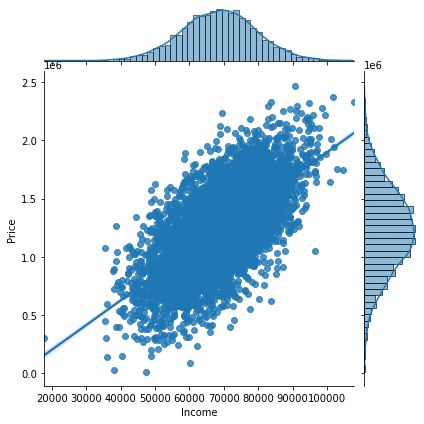

In [25]:
sns.jointplot(x = "Income", y = "Price", data = df, kind = "reg");

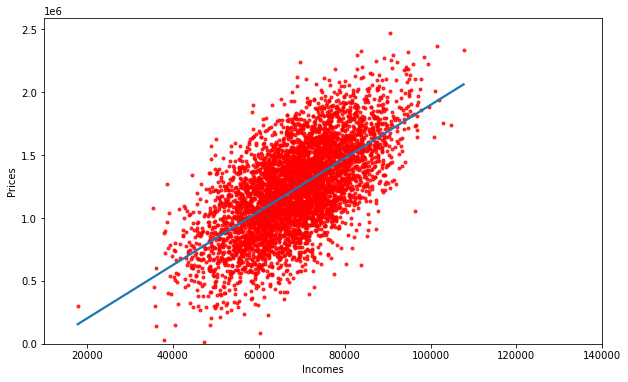

In [26]:
g = sns.regplot(df["Income"], df["Price"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_ylabel("Prices")
g.set_xlabel("Incomes")
import matplotlib.pyplot as plt
plt.xlim(10000,140000)
plt.ylim(bottom=0);


In [27]:
df = df[["Income", "Price"]]
df.head()

Income       Price
0 79545.459 1059033.558
1 79248.642 1505890.915
2 61287.067 1058987.988
3 63345.240 1260616.807
4 59982.197  630943.489

## Determine Dependent and Independent Variables

In [28]:
X = df.drop("Price", axis = 1)
y = df.Price

## Train - Test Split

In [29]:
y=df['Price']
X=np.array(df['Income']).reshape((-1, 1))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= random_state) 

In [32]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (3500, 1)
X_test : (1500, 1)
y_train : (3500,)
y_test : (1500,)


## Model Fitting

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
model.coef_

array([21.175203])

In [37]:
model.intercept_

-221052.29702309705

## Prediction

In [38]:
y_pred = model.predict(X_test)
y_pred

array([1192921.7949516 , 1095717.9479065 , 1338354.39105406, ...,
       1046529.91661214, 1028923.59004055, 1144892.07766601])

## Comparing

In [39]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [40]:
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")

Actual        pred    residual
1799   88591.770 1053010.385 -964418.615
1089  624432.966 1551943.041 -927510.075
1628  395440.202 1297663.360 -902223.158
2756  231189.821 1095485.883 -864296.062
1110  637951.906 1478998.779 -841046.874
...          ...         ...         ...
568  1496466.357  832060.649  664405.708
4833 1739761.373 1070638.483  669122.889
4716 1267986.688  594830.911  673155.777
4129 2187326.443 1424283.296  763043.147
924  2330289.701 1553728.309  776561.391

[1500 rows x 3 columns]

## Error Metrics

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model Performance: ")
    print("---------------------------");
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")


In [43]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.421341946530015
MAE 		: 214695.07178132542
MSE 		: 72207196010.25601
RMSE 		: 268713.9669058086


In [44]:
y_train_pred = model.predict(X_train)

In [45]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.4038246481091652
MAE 		: 218443.2280990151
MSE 		: 74263678017.56303
RMSE 		: 272513.62904919643


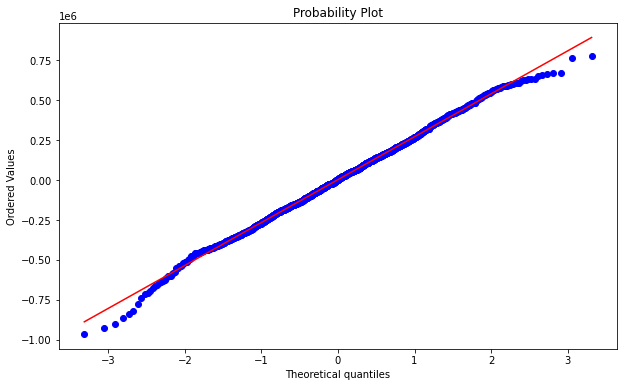

In [46]:
residuals = y_test - y_pred
stats.probplot(residuals, dist= "norm", plot = plt);


In [47]:
lr_scores = {"lr_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lr_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lr =pd.DataFrame(lr_scores)
lr

lr_train         lr_test
rmse      272513.629      268713.967
mae       218443.228      214695.072
mse  74263678017.563 72207196010.256
R2             0.404           0.421

# Multiple Linear Regression 


## Read Data

In [48]:
df=pd.read_csv("USA_Housing.csv")
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0            79545.459                5.683                      7.009   
1            79248.642                6.003                      6.731   
2            61287.067                5.866                      8.513   
3            63345.240                7.188                      5.587   
4            59982.197                5.041                      7.839   
...                ...                  ...                        ...   
4995         60567.944                7.830                      6.137   
4996         78491.275                6.999                      6.577   
4997         63390.687                7.251                      4.805   
4998         68001.331                5.534                      7.130   
4999         65510.582                5.992                      6.792   

      Avg. Area Number of Bedrooms  Area Population       Price  \
0                            4.090        23086.801 1059033.558   
1                            3.090        40173.072 1505890.915   
2                            5.130        36882.159 1058987.988   
3                            3.260        34310.243 1260616.807   
4                            4.230        26354.109  630943.489   
...                            ...              ...         ...   
4995                         3.460        22837.361 1060193.786   
4996                         4.020        25616.115 1482617.729   
4997                         2.130        33266.145 1030729.583   
4998                         5.440        42625.620 1198656.872   
4999                         4.070        46501.284 1298950.480   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]

## Data Preparation

In [49]:
df= df.drop("Address", axis=1)

## Visualizations

In [50]:
from scipy.stats import skew
for i in df.drop(columns= "Price").columns:
    print(i, skew(df[i]))
    

Avg. Area Income -0.03370985856853668
Avg. Area House Age -0.007211708023735578
Avg. Area Number of Rooms -0.040983610381965664
Avg. Area Number of Bedrooms 0.37612751568905145
Area Population 0.05063448536127159


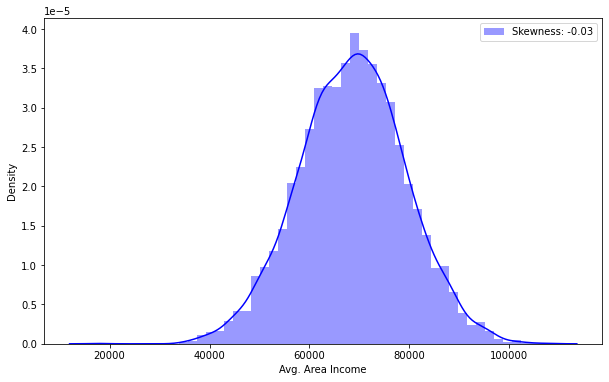

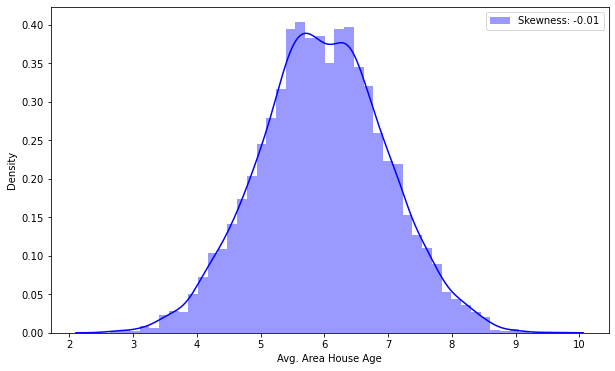

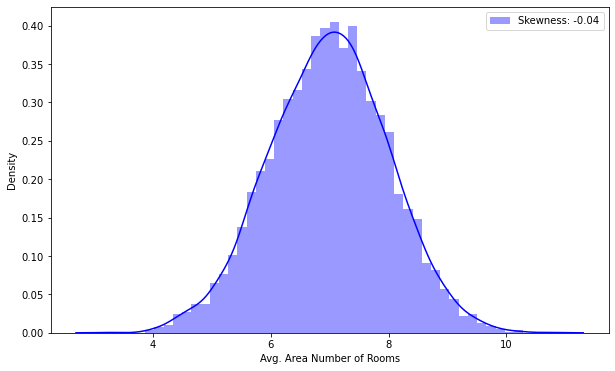

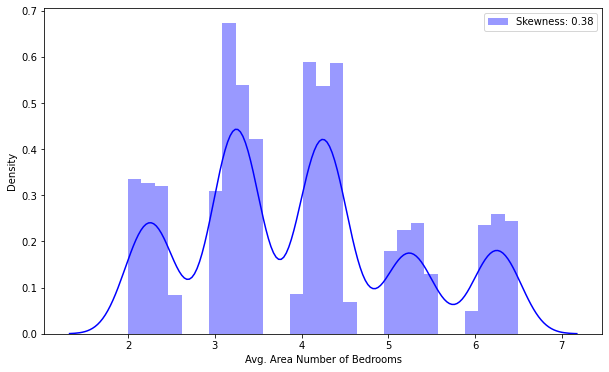

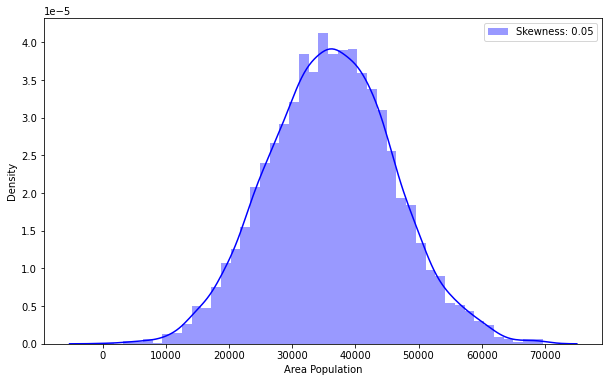

In [51]:
for j in df.drop(columns= "Price").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness: %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

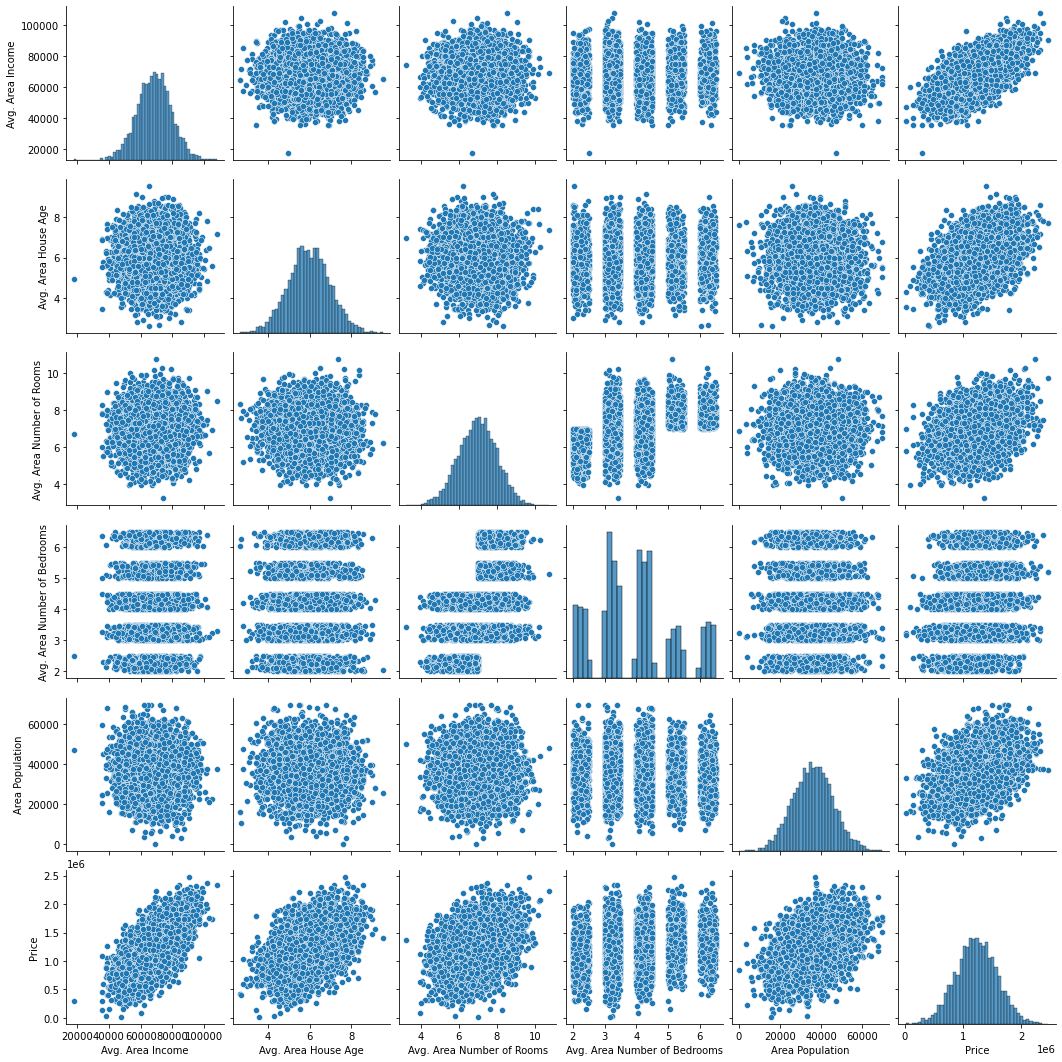

In [52]:
sns.pairplot(df)

## Determine Dependent and Independent Variables

In [53]:
X = df.drop("Price", axis = 1)
y = df.Price

## Train - Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= random_state) 

In [56]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (3500, 5)
X_test : (1500, 5)
y_train : (3500,)
y_test : (1500,)


## Scaling the Data

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
X_train=scaler.fit_transform(X_train)

In [59]:
X_test = scaler.transform(X_test)

## Model Fitting

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [61]:
lm.fit(X_train, y_train)

LinearRegression()

## Prediction

In [62]:
y_pred = lm.predict(X_test)

In [63]:
lm.coef_

array([228969.81200101, 161540.13671731, 121467.58123584,   1621.74313288,
       151077.09352959])

## Comparing

In [64]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [65]:
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")

Actual        pred    residual
4526 1074646.865 1410290.415 -335643.549
3720 1449829.494 1768104.972 -318275.478
3544 1333014.908 1627832.576 -294817.668
1807  764756.093 1051128.449 -286372.356
4491  717661.556  986203.977 -268542.421
...          ...         ...         ...
1875 1495518.624 1215451.022  280067.601
585  1841904.243 1557022.407  284881.836
1835 1538401.817 1250820.967  287580.851
749  1353854.478 1044953.491  308900.987
4716 1267986.688  907947.509  360039.178

[1500 rows x 3 columns]

## Error Metrics

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
y_train_pred = lm.predict(X_train)

In [68]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9177641115595528
MAE 		: 81397.50592978617
MSE 		: 10243864529.555187
RMSE 		: 101211.97819208549


In [69]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185060945363621
MAE 		: 81257.55795855969
MSE 		: 10169125565.89762
RMSE 		: 100842.08231635054


In [70]:
mlr_scores = {"mlr_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "mlr_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
mlr =pd.DataFrame(mlr_scores)
mlr

mlr_train        mlr_test
rmse      101211.978      100842.082
mae        81397.506       81257.558
mse  10243864529.555 10169125565.898
R2             0.918           0.919

# Polynomial Regression 


## Read Data

In [71]:
df=pd.read_csv("USA_Housing.csv")

## Determine Dependent and Independent Variables

In [72]:
df= df.drop("Address", axis=1)

In [73]:
X = df.drop("Price", axis = 1)
y = df.Price

## Train - Test Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= random_state) 

In [76]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (3500, 5)
X_test : (1500, 5)
y_train : (3500,)
y_test : (1500,)


## Determining the degree of polynomial

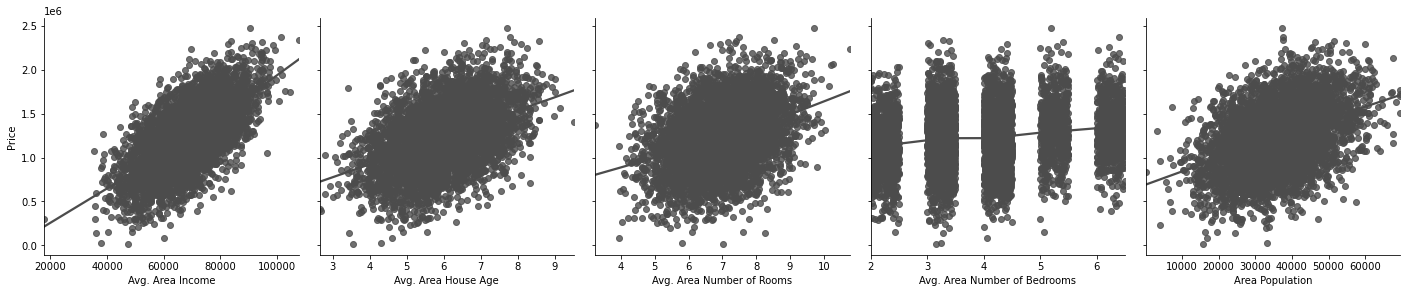

In [77]:
g = sns.PairGrid(df, y_vars=["Price"], x_vars = X.columns, height = 4)
g.map(sns.regplot, lowess = True, color = ".3")

Best degree 1 with RMSE 100842.08231635032


Text(0, 0.5, 'RMSE')

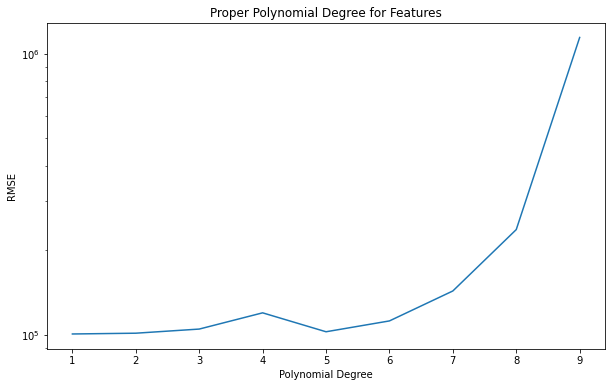

In [78]:
from sklearn.preprocessing import PolynomialFeatures
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.title.set_text("Proper Polynomial Degree for Features")
ax.set_yscale('log')
ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('RMSE')

## Polynomials of Features

In [79]:
from sklearn.preprocessing import PolynomialFeatures
polinomial_converter = PolynomialFeatures(degree= 2, include_bias= False)
poly_features = polinomial_converter.fit_transform(X)

In [80]:
df.shape, poly_features.shape

((5000, 6), (5000, 20))

In [81]:
def color_red_yellow(val):
    
    if val > 0.9 and val < 0.99:
        color = "red"
    elif val > -0.99  and val < -0.90:
        color = "yellow"
    else:
        color = "black"
    return f"color: {color}"  

In [82]:
# Featurelar arasındaki %90 büyük corelasyonu görselleştiriyoruz
# We visualize more than 90% correlation between features.

pd.DataFrame(poly_features).corr().style.applymap(color_red_yellow)

## Train - Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, 
                                                    test_size= 0.2, 
                                                    random_state= random_state)

In [85]:
print( "X_train features shape: {}\ny_train features shape: {}\nX_test features shape: {}\ny_test features shape: {}".format(X_train.shape, 
                                                                                                                             y_train.shape, 
                                                                                                                             X_test.shape, 
                                                                                                                             y_test.shape))

X_train features shape: (4000, 20)
y_train features shape: (4000,)
X_test features shape: (1000, 20)
y_test features shape: (1000,)


## Statsmodels

In [86]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.987e+04
Date:                Sun, 02 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:10:40   Log-Likelihood:                         -51883.
No. Observations:                4000   AIC:                                  1.038e+05
Df Residuals:                    3980   BIC:                                  1.039e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6947      1.568      0.443      0.658      -2.380       3.770
x2         -9.245e+04   1.77e+04     -5.218      0.000   -1.27e+05   -5.77e+04
x3         -1.339e+05   1.81e+04     -7.399      0.000   -1.69e+05   -9.84e+04
x4          1.182e+04   1.93e+04      0.611      0.541   -2.61e+04    4.97e+04
x5            -0.8663      1.894     -0.457      0.647      -4.579       2.847
x6          5.055e-05    9.9e-06      5.106      0.000    3.11e-05       7e-05
x7             0.9707      0.145      6.689      0.000       0.686       1.255
x8             0.7122      0.156      4.577      0.000       0.407       1.017
x9             0.0576      0.140      0.411      0.681      -0.217       0.332
x10          7.82e-05    1.5e-05      5.203      0.000    4.87e-05       0.000
x11         7527.7726   1189.823      6.327      0.000    5195.053    9860.492
x12         1.332e+04   1742.155      7.646      0.000    9905.027    1.67e+04
x13        -3312.8265   1526.561     -2.170      0.030   -6305.740    -319.913
x14            0.5751      0.157      3.659      0.000       0.267       0.883
x15         5941.2231   1332.119      4.460      0.000    3329.524    8552.922
x16         2541.2407   2241.465      1.134      0.257   -1853.285    6935.767
x17            0.8679      0.181      4.793      0.000       0.513       1.223
x18         -700.7908   1353.044     -0.518      0.605   -3353.515    1951.934
x19           -0.1672      0.153     -1.096      0.273      -0.466       0.132
x20         2.561e-05    1.2e-05      2.131      0.033    2.05e-06    4.92e-05
==============================================================================
Omnibus:                        2.100   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                2.141
Skew:                          -0.046   Prob(JB):                        0.343
Kurtosis:                       2.934   Cond. No.                     7.93e+10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.93e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Standardization

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()

In [89]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.05569623,  0.65886183, -0.86300913, ...,  0.14640917,
         0.27271367, -0.07078174],
       [-0.05545523, -0.58559522,  2.37598858, ...,  1.17898473,
         1.52815391,  0.61159461],
       [-1.11165023, -0.48032202,  0.13621855, ...,  1.90417846,
         2.45370416,  1.15397727],
       ...,
       [-1.20704442, -2.26895761, -0.11765963, ..., -1.13507682,
         0.0373074 ,  3.49893899],
       [-0.50898477, -0.03604344, -1.07361484, ..., -0.03820273,
        -0.14893467, -0.45604465],
       [ 0.62279188,  1.69958661,  1.456617  , ...,  0.14640917,
         1.67072086,  2.36220821]])

In [90]:
X_test = scaler.transform(X_test)
X_test

array([[-0.15814407, -0.25749338,  0.81034981, ...,  0.1381731 ,
         0.26451619, -0.07361064],
       [-0.58985658, -1.06096724,  0.44239375, ...,  2.04494397,
         0.31200445, -0.99014255],
       [ 0.48776731,  0.8082509 ,  1.35285484, ..., -0.5765851 ,
         0.0173242 ,  0.61504786],
       ...,
       [ 0.31236923, -0.05023869,  0.42572976, ..., -0.11532669,
         0.12435017,  0.01153379],
       [ 1.76951902, -0.95932998,  0.19918551, ...,  1.12742594,
        -1.71270287, -1.82930326],
       [ 0.17064975, -0.11618311, -0.20393509, ..., -1.06256125,
        -1.23528513, -0.83679499]])

In [91]:
# Standardizasyon scaling ile her bir feature ortalamasının 0, standart sapmasının 1 olduğunu görüyoruz.
# With standardization scaling, we see that the average of each feature is 0 and its standard deviation is 1.

In [92]:
pd.DataFrame(X_train).agg(["mean","std"]).round()

0      1     2     3      4      5     6      7     8      9     10  \
mean 0.000 -0.000 0.000 0.000 -0.000 -0.000 0.000 -0.000 0.000 -0.000 0.000   
std  1.000  1.000 1.000 1.000  1.000  1.000 1.000  1.000 1.000  1.000 1.000   

        11     12    13    14    15    16     17    18    19  
mean 0.000 -0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.000  
std  1.000  1.000 1.000 1.000 1.000 1.000  1.000 1.000 1.000

In [93]:
pd.DataFrame(X_test).agg(["mean","std"]).round()

0     1     2     3      4     5     6     7     8     9     10    11  \
mean 0.000 0.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
std  1.000 1.000 1.000 1.000  1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   

        12    13    14    15     16    17    18     19  
mean 0.000 0.000 0.000 0.000 -0.000 0.000 0.000 -0.000  
std  1.000 1.000 1.000 1.000  1.000 1.000 1.000  1.000

## Model Fitting

In [94]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [95]:
lm.fit(X_train, y_train)    

LinearRegression()

## Prediction

In [96]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [97]:
residuals = y_test - y_pred

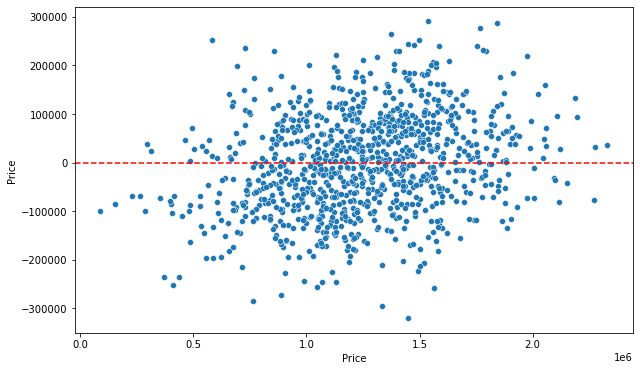

In [98]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()


<AxesSubplot:xlabel='Price', ylabel='Density'>

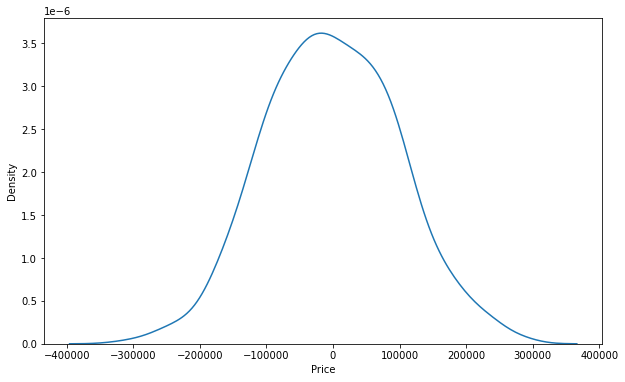

In [99]:
sns.kdeplot(residuals)

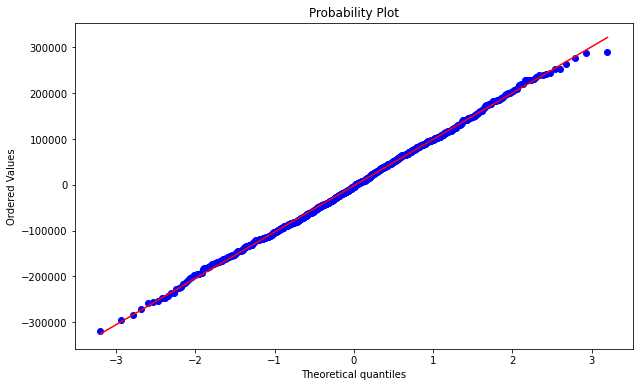

In [100]:
stats.probplot(residuals, dist= "norm", plot = plt);

## Comparing

In [101]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [102]:
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")

Actual        pred    residual
3720 1449829.494 1769654.299 -319824.805
3544 1333014.908 1627559.968 -294545.060
1807  764756.093 1048914.864 -284158.771
3018  888866.395 1160861.975 -271995.580
4193 1562887.225 1821562.008 -258674.783
...          ...         ...         ...
1875 1495518.624 1242613.059  252905.565
2835 1373512.302 1108911.458  264600.843
1783 1765281.093 1489380.059  275901.034
585  1841904.243 1553798.397  288105.847
1835 1538401.817 1248109.298  290292.519

[1000 rows x 3 columns]

In [103]:
result_sample = comparing.sample(20)
result_sample

Actual        pred    residual
4562 1121093.175  923548.196  197544.979
645  1080735.984 1072620.338    8115.646
893   850977.012  987325.688 -136348.676
2695 1149524.699 1123683.355   25841.343
2424 1473540.760 1460450.364   13090.396
3181 1377113.026 1287991.744   89121.282
427  1196064.330 1091656.617  104407.713
4746 1816152.267 1737836.323   78315.944
1612 1031737.385 1071752.572  -40015.187
596  1050239.904 1163260.439 -113020.535
818  1582261.701 1764439.310 -182177.609
1002 1734373.044 1770782.385  -36409.342
2093 1253359.954 1337680.446  -84320.492
1470  889385.902  839256.743   50129.159
990  2185480.091 2053024.347  132455.744
4454 1463383.487 1404482.993   58900.494
3695 1290784.491 1319975.284  -29190.793
1991 1225796.414 1140576.301   85220.113
1074  414571.223  483338.320  -68767.097
3573 1525205.646 1558486.410  -33280.764

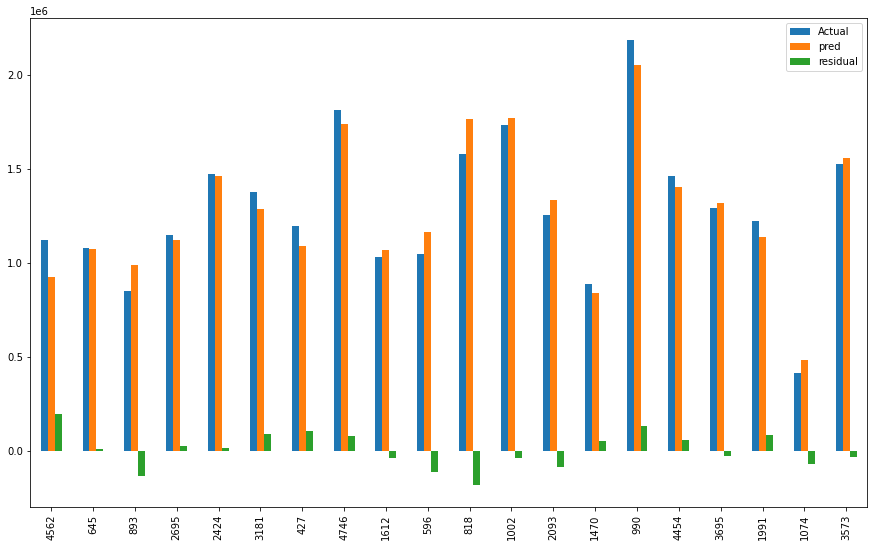

In [104]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

## Error Metrics

In [105]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9174604412725187
MAE 		: 81197.20577342552
MSE 		: 10213537480.95696
RMSE 		: 101062.04767842853


In [106]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9204218146751545
MAE 		: 81641.54547154388
MSE 		: 10196297892.471687
RMSE 		: 100976.71955689434


In [107]:
pr_scores = {"pr_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "pr_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
pr =pd.DataFrame(pr_scores)

# Evaluate Models

In [108]:
pd.concat([lr, mlr, pr], axis= 1)

lr_train         lr_test       mlr_train        mlr_test  \
rmse      272513.629      268713.967      101211.978      100842.082   
mae       218443.228      214695.072       81397.506       81257.558   
mse  74263678017.563 72207196010.256 10243864529.555 10169125565.898   
R2             0.404           0.421           0.918           0.919   

            pr_train         pr_test  
rmse      101062.048      100976.720  
mae        81197.206       81641.545  
mse  10213537480.957 10196297892.472  
R2             0.917           0.920

In [109]:
## As can be seen from the above table, Polinomial and multiple models are the best performing methods. 

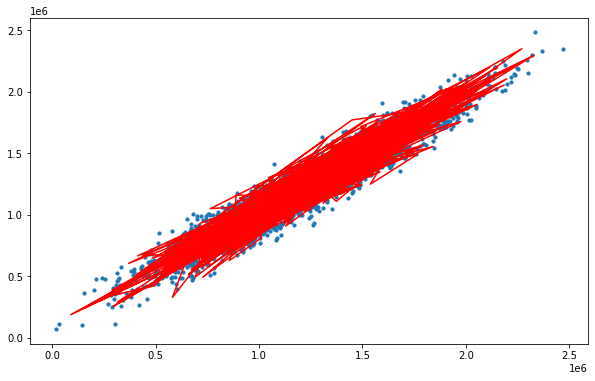

In [110]:
plt.scatter(y_train, y_train_pred, s=10)
plt.plot(y_test, y_pred, color= "red")

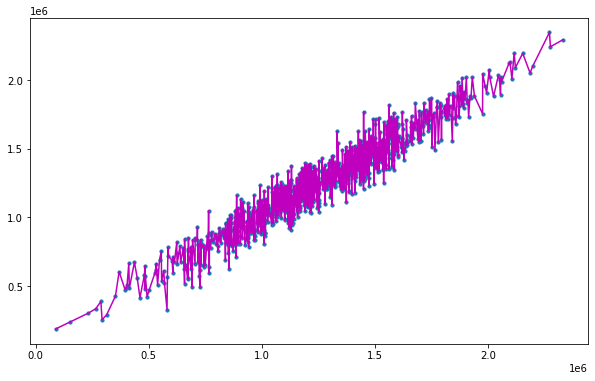

In [111]:
import operator
plt.scatter(y_test, y_pred, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(y_test,y_pred), key=sort_axis)
y_test, y_pred = zip(*sorted_zip)
plt.plot(y_test, y_pred, color='m')
plt.show()

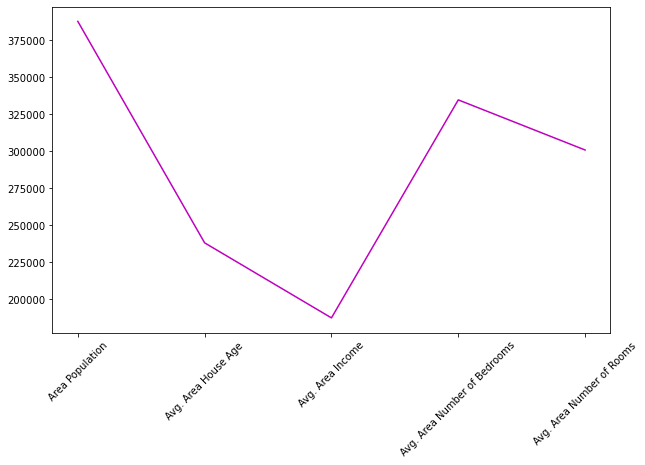

In [112]:
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.xticks(rotation=45)
plt.show()

# Improve Model 
    * Use Cross Validate
    * Use Ridge Regression
    * Use Lasso Regression
    * Use Elasticnet Regression
    * Use Grid-Search

## Cross Validation

### Read Data

In [113]:
df=pd.read_csv("USA_Housing.csv")

### Determine Dependent and Independent Variables

In [114]:
df= df.drop("Address", axis=1)

In [115]:
X = df.drop("Price", axis = 1)
y = df.Price

### Train - Test Split

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= random_state) 

In [118]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (3500, 5)
X_test : (1500, 5)
y_train : (3500,)
y_test : (1500,)


### Scaling the Data

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [120]:
X_train=scaler.fit_transform(X_train)

In [121]:
X_test = scaler.transform(X_test)

In [122]:
from sklearn.model_selection import cross_validate, cross_val_score

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [124]:
scores = cross_validate(model, X_train, y_train, scoring = ["r2","neg_median_absolute_error", 
                                                            "neg_mean_squared_error",
                                                            "neg_root_mean_squared_error"], 
                                                            cv = 10)

In [125]:
scores = pd.DataFrame(scores, index = range(1,11))
scores

fit_time  score_time  test_r2  test_neg_median_absolute_error  \
1      0.002       0.002    0.903                      -67386.473   
2      0.003       0.002    0.923                      -68083.027   
3      0.002       0.002    0.920                      -78512.760   
4      0.003       0.003    0.918                      -75235.114   
5      0.002       0.003    0.914                      -64967.593   
6      0.002       0.001    0.919                      -71622.763   
7      0.001       0.002    0.920                      -68857.794   
8      0.002       0.002    0.914                      -69238.304   
9      0.002       0.002    0.913                      -68373.270   
10     0.002       0.002    0.927                      -66380.408   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1              -11643539043.481                       -107905.232  
2               -9935753864.814                        -99678.252  
3              -10473567422.651                       -102340.449  
4              -10119111957.168                       -100593.797  
5              -10263210739.551                       -101307.506  
6              -10777888766.480                       -103816.611  
7              -10094628142.027                       -100472.027  
8              -10756618800.974                       -103714.121  
9              -10158328038.214                       -100788.531  
10              -8693564718.974                        -93239.287

In [126]:
scores.iloc[:,2:].mean()

test_r2                                       0.917
test_neg_median_absolute_error           -69865.751
test_neg_mean_squared_error        -10291621149.433
test_neg_root_mean_squared_error        -101385.581
dtype: float64

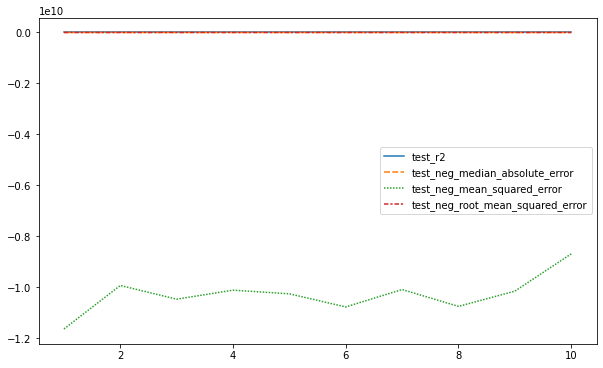

In [127]:
sns.lineplot(data = scores.iloc[:,2:]);

In [128]:
lm.coef_

array([228510.97654759, 133536.42531846, 104018.87758963,  38344.06889705,
       138984.46476607,  11663.07496715,   1544.50691753, -27335.43955356,
         8042.47969572,   9784.58568818,  25590.47869598,  23498.35841964,
       -25675.98678352,  -5956.27055253,  16752.03178571,  -6741.25677956,
        10740.05711164, -11021.61338824,  -5805.20027486,   4324.61737249])

In [129]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm.coef_"])

In [130]:
lm_df

lm.coef_
0  228510.977
1  133536.425
2  104018.878
3   38344.069
4  138984.465
5   11663.075
6    1544.507
7  -27335.440
8    8042.480
9    9784.586
10  25590.479
11  23498.358
12 -25675.987
13  -5956.271
14  16752.032
15  -6741.257
16  10740.057
17 -11021.613
18  -5805.200
19   4324.617

In [131]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185060945363621
MAE 		: 81257.55795855969
MSE 		: 10169125565.89762
RMSE 		: 100842.08231635054


In [132]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9177641115595528
MAE 		: 81397.50592978617
MSE 		: 10243864529.555187
RMSE 		: 101211.97819208549


In [133]:
cv_scores = {"cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
cv =pd.DataFrame(cv_scores)
cv

cv_train         cv_test
rmse      101211.978      100842.082
mae        81397.506       81257.558
mse  10243864529.555 10169125565.898
R2             0.918           0.919

## Ridge Regression

### Read Data

In [134]:
df=pd.read_csv("USA_Housing.csv")

### Determine Dependent and Independent Variables

In [135]:
df= df.drop("Address", axis=1)

In [136]:
X = df.drop("Price", axis = 1)
y = df.Price

### Train - Test Split

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= random_state) 

In [139]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (3500, 5)
X_test : (1500, 5)
y_train : (3500,)
y_test : (1500,)


### Scaling the Data

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [141]:
X_train=scaler.fit_transform(X_train)

In [142]:
X_test = scaler.transform(X_test)

### Model Fitting

In [143]:
from sklearn.linear_model import Ridge

In [144]:
ridge_model = Ridge(alpha = 1)

In [145]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [146]:
ridge_model.coef_

array([228902.91465518, 161493.09932819, 121422.87078209,   1642.21603926,
       151033.58817336])

### Prediction and Error Metrics

In [147]:
y_pred = ridge_model.predict(X_test)
y_train_pred = ridge_model.predict(X_train)

In [148]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185084332489911
MAE 		: 81255.5021404234
MSE 		: 10168833732.265991
RMSE 		: 100840.63532260193


In [149]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9177640315675404
MAE 		: 81399.61615872526
MSE 		: 10243874493.907179
RMSE 		: 101212.02741723525


In [150]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs =pd.DataFrame(ridge_scores)
rs

ridge_train      ridge_test
rmse      101212.027      100840.635
mae        81399.616       81255.502
mse  10243874493.907 10168833732.266
R2             0.918           0.919

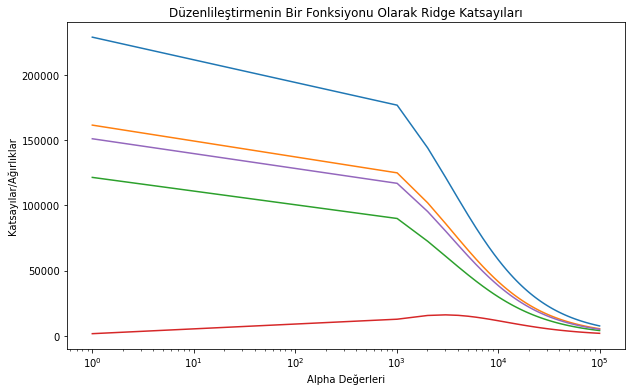

In [151]:
alpha_space = np.linspace(1,100000,100)

ridge_modell = Ridge()
katsayilar = []

for i in alpha_space:
    ridge_modell.set_params(alpha = i)
    ridge_modell.fit(X_train, y_train) 
    katsayilar.append(ridge_modell.coef_) 
    

    
ax = plt.gca()
ax.plot(alpha_space, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Alpha Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

### Cross Validation

In [152]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train, scoring = ["r2",
                                                            "neg_median_absolute_error", 
                                                            "neg_mean_squared_error",
                                                            "neg_root_mean_squared_error"], 
                                                            cv = 10)

In [153]:
scores = pd.DataFrame(scores, index = range(1,11))
scores.iloc[:,2:]

test_r2  test_neg_median_absolute_error  test_neg_mean_squared_error  \
1     0.903                      -67616.751             -11642779883.438   
2     0.923                      -68026.056              -9937819086.758   
3     0.920                      -78475.383             -10473714789.679   
4     0.917                      -75242.840             -10120709004.839   
5     0.914                      -65041.516             -10262966413.912   
6     0.919                      -71478.276             -10778445104.528   
7     0.920                      -68930.928             -10094089239.069   
8     0.914                      -69247.408             -10756765582.490   
9     0.913                      -68354.620             -10156645729.021   
10    0.927                      -66395.563              -8692212485.124   

    test_neg_root_mean_squared_error  
1                        -107901.714  
2                         -99688.611  
3                        -102341.169  
4                        -100601.735  
5                        -101306.300  
6                        -103819.291  
7                        -100469.345  
8                        -103714.828  
9                        -100780.185  
10                        -93232.036

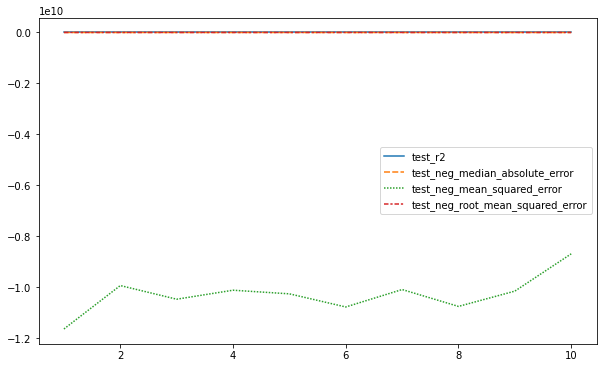

In [154]:
sns.lineplot(data =  scores.iloc[:,2:]);

In [155]:
pd.DataFrame(scores, index = range(1,11)).iloc[:,2:].mean()

test_r2                                       0.917
test_neg_median_absolute_error           -69880.934
test_neg_mean_squared_error        -10291614731.886
test_neg_root_mean_squared_error        -101385.521
dtype: float64

In [156]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185084332489911
MAE 		: 81255.5021404234
MSE 		: 10168833732.265991
RMSE 		: 100840.63532260193


In [157]:
ridge_model.coef_

array([228902.91465518, 161493.09932819, 121422.87078209,   1642.21603926,
       151033.58817336])

In [158]:
rm_df = pd.DataFrame(ridge_model.coef_,columns = ["ridge_coef_1"])

In [159]:
pd.concat([lm_df,rm_df],axis=1)

lm.coef_  ridge_coef_1
0  228510.977    228902.915
1  133536.425    161493.099
2  104018.878    121422.871
3   38344.069      1642.216
4  138984.465    151033.588
5   11663.075           NaN
6    1544.507           NaN
7  -27335.440           NaN
8    8042.480           NaN
9    9784.586           NaN
10  25590.479           NaN
11  23498.358           NaN
12 -25675.987           NaN
13  -5956.271           NaN
14  16752.032           NaN
15  -6741.257           NaN
16  10740.057           NaN
17 -11021.613           NaN
18  -5805.200           NaN
19   4324.617           NaN

### Model Tuning

In [160]:
from sklearn.linear_model import RidgeCV

In [161]:
alpha_space = np.linspace(0.1,10,100)
alpha_space

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ])

In [162]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring="neg_root_mean_squared_error")

In [163]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [164]:
ridge_cv_model.alpha_

1.0

In [165]:
y_pred = ridge_cv_model.predict(X_test)

In [166]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185084332489911
MAE 		: 81255.5021404234
MSE 		: 10168833732.265991
RMSE 		: 100840.63532260193


In [167]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9177640315675404
MAE 		: 81399.61615872526
MSE 		: 10243874493.907179
RMSE 		: 101212.02741723525


In [168]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

ridge_cv_train   ridge_cv_test
rmse      101212.027      100840.635
mae        81399.616       81255.502
mse  10243874493.907 10168833732.266
R2             0.918           0.919

In [169]:
pd.concat([cv,rs,rcs], axis = 1)

cv_train         cv_test     ridge_train      ridge_test  \
rmse      101211.978      100842.082      101212.027      100840.635   
mae        81397.506       81257.558       81399.616       81255.502   
mse  10243864529.555 10169125565.898 10243874493.907 10168833732.266   
R2             0.918           0.919           0.918           0.919   

      ridge_cv_train   ridge_cv_test  
rmse      101212.027      100840.635  
mae        81399.616       81255.502  
mse  10243874493.907 10168833732.266  
R2             0.918           0.919

In [170]:
ridge_cv_model.coef_

array([228902.91465518, 161493.09932819, 121422.87078209,   1642.21603926,
       151033.58817336])

In [171]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["Ridge_cv_coef_2.40"])
rcm_df

Ridge_cv_coef_2.40
0          228902.915
1          161493.099
2          121422.871
3            1642.216
4          151033.588

In [172]:
pd.concat([lm_df, rm_df, rcm_df],axis = 1)

lm.coef_  ridge_coef_1  Ridge_cv_coef_2.40
0  228510.977    228902.915          228902.915
1  133536.425    161493.099          161493.099
2  104018.878    121422.871          121422.871
3   38344.069      1642.216            1642.216
4  138984.465    151033.588          151033.588
5   11663.075           NaN                 NaN
6    1544.507           NaN                 NaN
7  -27335.440           NaN                 NaN
8    8042.480           NaN                 NaN
9    9784.586           NaN                 NaN
10  25590.479           NaN                 NaN
11  23498.358           NaN                 NaN
12 -25675.987           NaN                 NaN
13  -5956.271           NaN                 NaN
14  16752.032           NaN                 NaN
15  -6741.257           NaN                 NaN
16  10740.057           NaN                 NaN
17 -11021.613           NaN                 NaN
18  -5805.200           NaN                 NaN
19   4324.617           NaN                 NaN

In [173]:
# Alfa değerim büyüdükçe ( 1 den 2.40 olduğunda) coef katsayılarım azalıyor! 
# Dikkat! çok büyütürsek UNDERFITTING'e gider!!

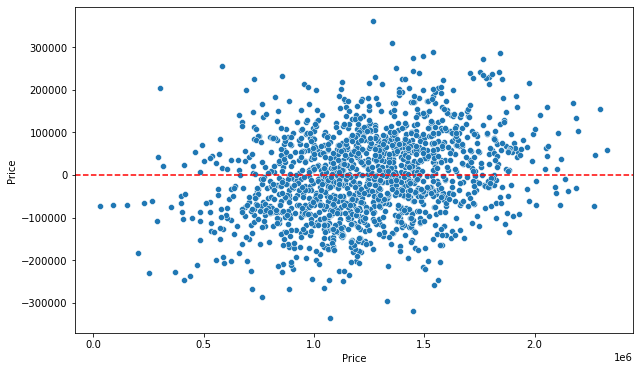

In [174]:
residuals = y_test-y_pred
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

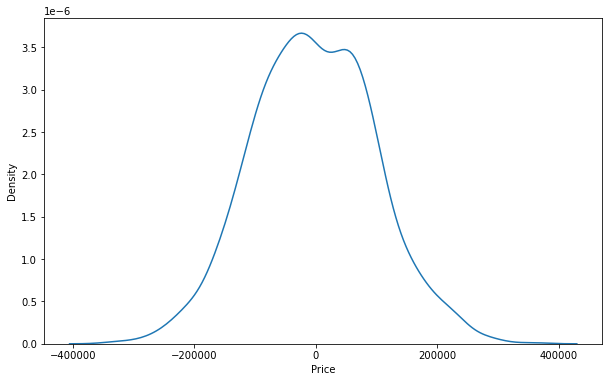

In [175]:
sns.kdeplot(residuals)

In [176]:
import scipy.stats as stats

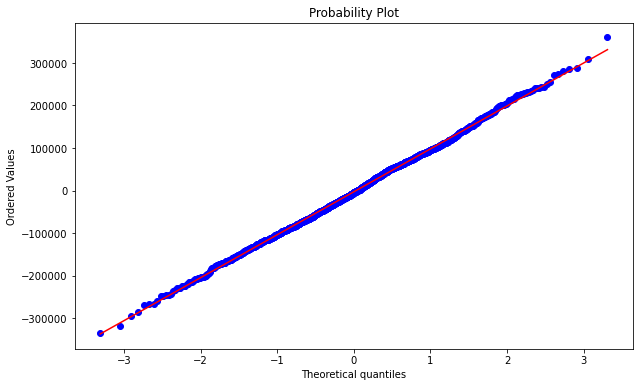

In [177]:
stats.probplot(residuals, dist= "norm", plot = plt);

In [178]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [179]:
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")

Actual        pred    residual
4526 1074646.865 1410213.639 -335566.774
3720 1449829.494 1767948.519 -318119.025
3544 1333014.908 1627697.262 -294682.354
1807  764756.093 1051166.367 -286410.274
4491  717661.556  986272.036 -268610.480
...          ...         ...         ...
1875 1495518.624 1215478.887  280039.737
585  1841904.243 1556943.768  284960.475
1835 1538401.817 1250821.930  287579.887
749  1353854.478 1044989.049  308865.429
4716 1267986.688  908041.808  359944.880

[1500 rows x 3 columns]

In [180]:
result_sample = comparing.sample(20)
result_sample

Actual        pred    residual
3476 1325149.920 1326830.261   -1680.342
2360 1062095.468 1122481.511  -60386.043
4652 1005089.894  886655.299  118434.595
2165  777144.254  871471.060  -94326.805
3380 1155801.253 1046008.583  109792.670
42    882057.171  793546.357   88510.813
1638 1779874.754 1553201.230  226673.524
2392  910099.644 1069595.601 -159495.957
2967 1123753.734 1199579.326  -75825.592
3144  968411.624  840247.684  128163.941
3202  607858.991  709146.658 -101287.667
877   762144.926  771361.656   -9216.730
4202 1153680.146 1229041.715  -75361.569
1976 1386351.145 1431506.025  -45154.880
520  1115013.147 1339488.691 -224475.544
372  1159953.593 1204742.476  -44788.883
786  1427108.501 1473705.534  -46597.033
3548 1459834.789 1500751.678  -40916.888
2083 1080170.907 1147326.725  -67155.818
3686  412057.440  389080.592   22976.848

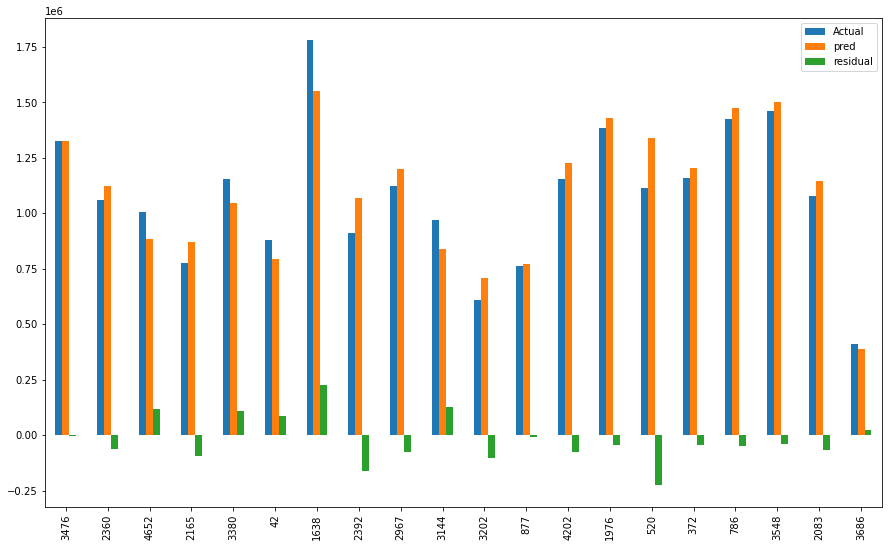

In [181]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

## LASSO

### Model Fitting

In [182]:
from sklearn.linear_model import Lasso, LassoCV

In [183]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [184]:
lasso_model.coef_

array([228968.85757155, 161539.2283956 , 121467.93481601,   1620.57874977,
       151076.03831806])

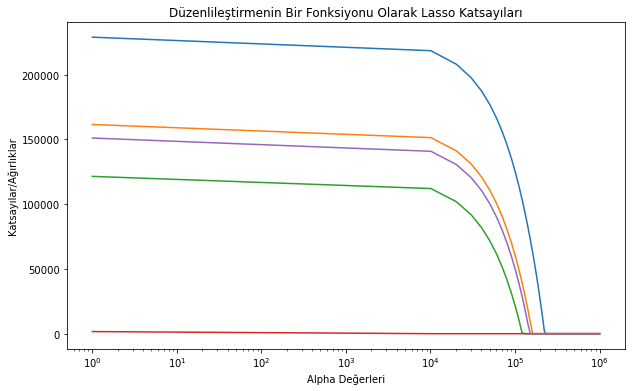

In [185]:
alpha_space = np.linspace(1,1000000,100)

lasso_modell = Lasso()
katsayilar = []

for i in alpha_space:
    lasso_modell.set_params(alpha = i)
    lasso_modell.fit(X_train, y_train) 
    katsayilar.append(lasso_modell.coef_) 
    

    
ax = plt.gca()
ax.plot(alpha_space, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Alpha Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Lasso Katsayıları');

### Prediction and Error Metrics

In [186]:
y_pred = lasso_model.predict(X_test)
y_train_pred = lasso_model.predict(X_train)

In [187]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9177641115281978
MAE 		: 81397.51499957165
MSE 		: 10243864533.460987
RMSE 		: 101211.97821138063


In [188]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185060955649413
MAE 		: 81257.53812298157
MSE 		: 10169125437.54751
RMSE 		: 100842.08167995894


In [189]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

lasso_train      lasso_test
rmse      101211.978      100842.082
mae        81397.515       81257.538
mse  10243864533.461 10169125437.548
R2             0.918           0.919

In [190]:
pd.concat([cv, rs, rcs,lss], axis = 1)

cv_train         cv_test     ridge_train      ridge_test  \
rmse      101211.978      100842.082      101212.027      100840.635   
mae        81397.506       81257.558       81399.616       81255.502   
mse  10243864529.555 10169125565.898 10243874493.907 10168833732.266   
R2             0.918           0.919           0.918           0.919   

      ridge_cv_train   ridge_cv_test     lasso_train      lasso_test  
rmse      101212.027      100840.635      101211.978      100842.082  
mae        81399.616       81255.502       81397.515       81257.538  
mse  10243874493.907 10168833732.266 10243864533.461 10169125437.548  
R2             0.918           0.919           0.918           0.919

### Cross Validation (For Lasso CV with Default Alpha : 1)

In [191]:
model = Lasso(alpha= 1)
scores = cross_validate(model, X_train, y_train,
                       scoring=["r2", "neg_mean_absolute_error", 
                                "neg_mean_squared_error", 
                                "neg_root_mean_squared_error"], 
                                cv= 10)

In [192]:
scores = pd.DataFrame(scores, index= range(1, 11))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1     0.903                    -86174.960             -11643516233.090   
2     0.923                    -80597.121              -9935786645.263   
3     0.920                    -84359.879             -10473584913.289   
4     0.918                    -82399.364             -10119132882.075   
5     0.914                    -80853.446             -10263187052.695   
6     0.919                    -83172.258             -10777906837.281   
7     0.920                    -79998.311             -10094622618.763   
8     0.914                    -82831.546             -10756623167.309   
9     0.913                    -79796.413             -10158303089.391   
10    0.927                    -75688.063              -8693546077.334   

    test_neg_root_mean_squared_error  
1                        -107905.126  
2                         -99678.416  
3                        -102340.534  
4                        -100593.901  
5                        -101307.389  
6                        -103816.698  
7                        -100471.999  
8                        -103714.142  
9                        -100788.408  
10                        -93239.187

In [193]:
scores = pd.DataFrame(scores, index= range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                       0.917
test_neg_mean_absolute_error             -81587.136
test_neg_mean_squared_error        -10291620951.649
test_neg_root_mean_squared_error        -101385.580
dtype: float64

<AxesSubplot:>

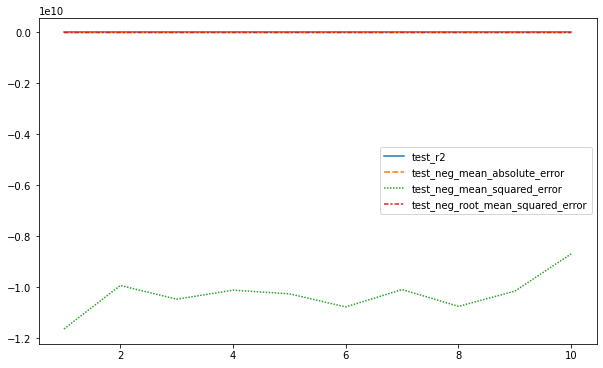

In [194]:
sns.lineplot(data= scores.iloc[:,2:])

In [195]:
pd.DataFrame(scores).iloc[:,2:].mean()

test_r2                                       0.917
test_neg_mean_absolute_error             -81587.136
test_neg_mean_squared_error        -10291620951.649
test_neg_root_mean_squared_error        -101385.580
dtype: float64

In [196]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185060955649413
MAE 		: 81257.53812298157
MSE 		: 10169125437.54751
RMSE 		: 100842.08167995894


In [197]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9177641115281978
MAE 		: 81397.51499957165
MSE 		: 10243864533.460987
RMSE 		: 101211.97821138063


In [198]:
lasso_model.coef_

array([228968.85757155, 161539.2283956 , 121467.93481601,   1620.57874977,
       151076.03831806])

In [199]:
lsm_df= pd.DataFrame(lasso_model.coef_, columns= ["lasso_coef_1"])

In [200]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis= 1)

lm.coef_  ridge_coef_1  Ridge_cv_coef_2.40  lasso_coef_1
0  228510.977    228902.915          228902.915    228968.858
1  133536.425    161493.099          161493.099    161539.228
2  104018.878    121422.871          121422.871    121467.935
3   38344.069      1642.216            1642.216      1620.579
4  138984.465    151033.588          151033.588    151076.038
5   11663.075           NaN                 NaN           NaN
6    1544.507           NaN                 NaN           NaN
7  -27335.440           NaN                 NaN           NaN
8    8042.480           NaN                 NaN           NaN
9    9784.586           NaN                 NaN           NaN
10  25590.479           NaN                 NaN           NaN
11  23498.358           NaN                 NaN           NaN
12 -25675.987           NaN                 NaN           NaN
13  -5956.271           NaN                 NaN           NaN
14  16752.032           NaN                 NaN           NaN
15  -6741.257           NaN                 NaN           NaN
16  10740.057           NaN                 NaN           NaN
17 -11021.613           NaN                 NaN           NaN
18  -5805.200           NaN                 NaN           NaN
19   4324.617           NaN                 NaN           NaN

### Model Tuning

In [201]:
alpha_space = np.linspace(0.1,100,1000)

In [202]:
lasso_cv_model = LassoCV(alphas= alpha_space, cv= 10, max_iter = 100000)
# max_iter defaultu 1. Hata alırsan max_iter yetersiz kalmış demektir, bu değeri arttır. 100000 yapabilirsin.

In [203]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
         7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
         8.2,   8.3,   8.4,...
        92.8,  92.9,  93. ,  93.1,  93.2,  93.3,  93.4,  93.5,  93.6,
        93.7,  93.8,  93.9,  94. ,  94.1,  94.2,  94.3,  94.4,  94.5,
        94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,
        95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.8,  9

In [204]:
lasso_cv_model.alpha_

7.3

In [205]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9177641098942506
MAE 		: 81397.6236794379
MSE 		: 10243864736.996613
RMSE 		: 101211.97921687241


In [206]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185061879005986
MAE 		: 81257.35136807417
MSE 		: 10169113915.546118
RMSE 		: 100842.02455100809


In [207]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

lasso_cv_train   lasso_cv_test
rmse      101211.979      100842.025
mae        81397.624       81257.351
mse  10243864736.997 10169113915.546
R2             0.918           0.919

In [208]:
pd.concat([cv,rs, rcs, lss, lcs], axis = 1)

cv_train         cv_test     ridge_train      ridge_test  \
rmse      101211.978      100842.082      101212.027      100840.635   
mae        81397.506       81257.558       81399.616       81255.502   
mse  10243864529.555 10169125565.898 10243874493.907 10168833732.266   
R2             0.918           0.919           0.918           0.919   

      ridge_cv_train   ridge_cv_test     lasso_train      lasso_test  \
rmse      101212.027      100840.635      101211.978      100842.082   
mae        81399.616       81255.502       81397.515       81257.538   
mse  10243874493.907 10168833732.266 10243864533.461 10169125437.548   
R2             0.918           0.919           0.918           0.919   

      lasso_cv_train   lasso_cv_test  
rmse      101211.979      100842.025  
mae        81397.624       81257.351  
mse  10243864736.997 10169113915.546  
R2             0.918           0.919

In [209]:
lasso_cv_model.coef_

array([228962.64056535, 161533.2885244 , 121467.35170679,   1614.55466404,
       151069.46251039])

In [210]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [211]:
pd.concat([lm_df, rm_df, rcm_df, lcm_df], axis= 1)

lm.coef_  ridge_coef_1  Ridge_cv_coef_2.40  lasso_cv_coef_0.01
0  228510.977    228902.915          228902.915          228962.641
1  133536.425    161493.099          161493.099          161533.289
2  104018.878    121422.871          121422.871          121467.352
3   38344.069      1642.216            1642.216            1614.555
4  138984.465    151033.588          151033.588          151069.463
5   11663.075           NaN                 NaN                 NaN
6    1544.507           NaN                 NaN                 NaN
7  -27335.440           NaN                 NaN                 NaN
8    8042.480           NaN                 NaN                 NaN
9    9784.586           NaN                 NaN                 NaN
10  25590.479           NaN                 NaN                 NaN
11  23498.358           NaN                 NaN                 NaN
12 -25675.987           NaN                 NaN                 NaN
13  -5956.271           NaN                 NaN                 NaN
14  16752.032           NaN                 NaN                 NaN
15  -6741.257           NaN                 NaN                 NaN
16  10740.057           NaN                 NaN                 NaN
17 -11021.613           NaN                 NaN                 NaN
18  -5805.200           NaN                 NaN                 NaN
19   4324.617           NaN                 NaN                 NaN

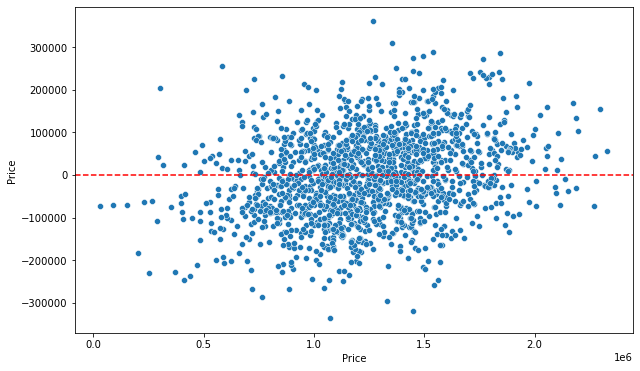

In [212]:
residuals = y_test-y_pred
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

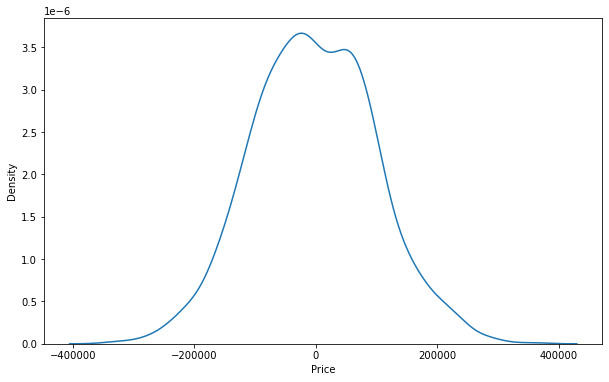

In [213]:
sns.kdeplot(residuals)

In [214]:
import scipy.stats as stats

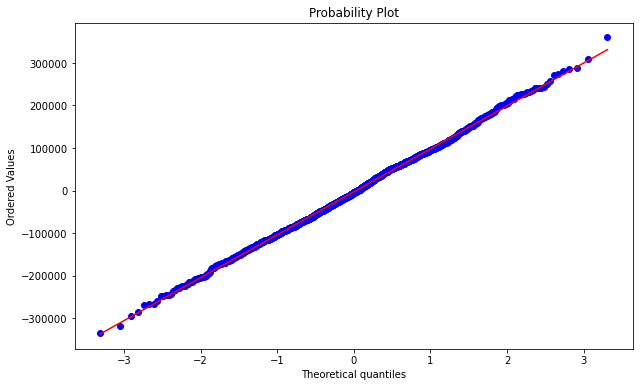

In [215]:
stats.probplot(residuals, dist= "norm", plot = plt);

In [216]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [217]:
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")

Actual        pred    residual
4526 1074646.865 1410289.152 -335642.287
3720 1449829.494 1768081.899 -318252.405
3544 1333014.908 1627823.835 -294808.927
1807  764756.093 1051138.763 -286382.670
4491  717661.556  986219.711 -268558.155
...          ...         ...         ...
1875 1495518.624 1215443.794  280074.830
585  1841904.243 1557006.871  284897.373
1835 1538401.817 1250816.092  287585.725
749  1353854.478 1044963.463  308891.015
4716 1267986.688  907952.229  360034.458

[1500 rows x 3 columns]

In [218]:
result_sample = comparing.sample(20)
result_sample

Actual        pred    residual
4383  868435.275  789000.216   79435.059
844   539483.397  494816.886   44666.511
260  1113373.520 1106737.891    6635.629
3009 1574181.732 1382760.013  191421.719
2436 1460341.011 1472421.590  -12080.579
2288  879062.591  900690.827  -21628.236
2497 1202227.957 1103149.428   99078.529
3255 1188255.081 1128128.121   60126.960
4166 1220591.006 1287537.838  -66946.832
36   1233220.009 1333941.699 -100721.690
3585 1506651.157 1541207.823  -34556.667
4194 1567859.073 1602124.806  -34265.733
3720 1449829.494 1768081.899 -318252.405
3592 1211110.084 1106459.431  104650.653
2096 1474296.416 1473584.714     711.701
3795  764799.883  733782.004   31017.879
1477 1007856.266 1206510.118 -198653.851
3928  862865.815  790417.200   72448.616
1890 1008649.929 1056851.560  -48201.631
2204 1543357.454 1504190.434   39167.020

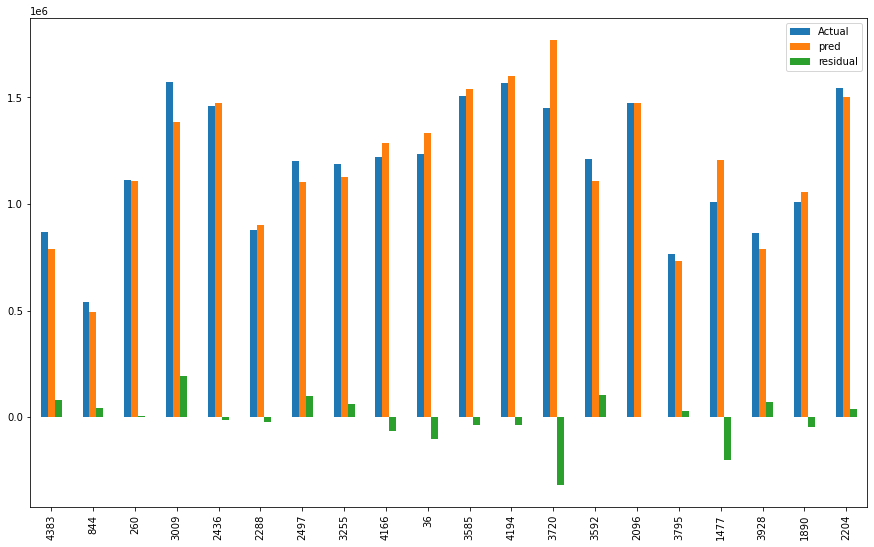

In [219]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

## Elastic Net - ENET

### Model Fitting

In [220]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [221]:
elastic_model = ElasticNet()

In [222]:
elastic_model.fit(X_train, y_train)

ElasticNet()

In [223]:
elastic_model.l1_ratio

0.5

In [224]:
elastic_model.alpha

1.0

### Prediction

In [225]:
y_pred = elastic_model.predict(X_test)
y_train_pred = elastic_model.predict(X_train)

### Error Metrics

In [226]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.8138323326674388
MAE 		: 121782.90133491029
MSE 		: 23190317513.491714
RMSE 		: 152283.67448118565


In [227]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.8166010442934817
MAE 		: 121206.26999686849
MSE 		: 22885232933.967495
RMSE 		: 151278.65987629417


In [228]:
elastic_scores = {"elastic_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                              "mae": mean_absolute_error(y_train, y_train_pred),
                              "mse": mean_squared_error(y_train, y_train_pred),
                              "R2" : r2_score(y_train, y_train_pred)},
                "elastic_test": {"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                              "mae": mean_absolute_error(y_test, y_pred),
                              "mse": mean_squared_error(y_test, y_pred),
                              "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

elastic_train    elastic_test
rmse      152283.674      151278.660
mae       121782.901      121206.270
mse  23190317513.492 22885232933.967
R2             0.814           0.817

In [229]:
pd.concat([cv, rs, rcs, lss, lcs, es], axis = 1)

cv_train         cv_test     ridge_train      ridge_test  \
rmse      101211.978      100842.082      101212.027      100840.635   
mae        81397.506       81257.558       81399.616       81255.502   
mse  10243864529.555 10169125565.898 10243874493.907 10168833732.266   
R2             0.918           0.919           0.918           0.919   

      ridge_cv_train   ridge_cv_test     lasso_train      lasso_test  \
rmse      101212.027      100840.635      101211.978      100842.082   
mae        81399.616       81255.502       81397.515       81257.538   
mse  10243874493.907 10168833732.266 10243864533.461 10169125437.548   
R2             0.918           0.919           0.918           0.919   

      lasso_cv_train   lasso_cv_test   elastic_train    elastic_test  
rmse      101211.979      100842.025      152283.674      151278.660  
mae        81397.624       81257.351      121782.901      121206.270  
mse  10243864736.997 10169113915.546 23190317513.492 22885232933.967  
R2             0.918           0.919           0.814           0.817

In [230]:
elastic_model.coef_

array([151554.25128685, 107201.16679434,  76376.57965456,  15180.28679889,
       100222.52634716])

In [231]:
em_df = pd.DataFrame(elastic_model.coef_, columns= ["elastic_coef_(alp: 1, l1: 0.5)"])

In [232]:
pd.concat([lm_df, rm_df, rcm_df, lcm_df, em_df], axis= 1)

lm.coef_  ridge_coef_1  Ridge_cv_coef_2.40  lasso_cv_coef_0.01  \
0  228510.977    228902.915          228902.915          228962.641   
1  133536.425    161493.099          161493.099          161533.289   
2  104018.878    121422.871          121422.871          121467.352   
3   38344.069      1642.216            1642.216            1614.555   
4  138984.465    151033.588          151033.588          151069.463   
5   11663.075           NaN                 NaN                 NaN   
6    1544.507           NaN                 NaN                 NaN   
7  -27335.440           NaN                 NaN                 NaN   
8    8042.480           NaN                 NaN                 NaN   
9    9784.586           NaN                 NaN                 NaN   
10  25590.479           NaN                 NaN                 NaN   
11  23498.358           NaN                 NaN                 NaN   
12 -25675.987           NaN                 NaN                 NaN   
13  -5956.271           NaN                 NaN                 NaN   
14  16752.032           NaN                 NaN                 NaN   
15  -6741.257           NaN                 NaN                 NaN   
16  10740.057           NaN                 NaN                 NaN   
17 -11021.613           NaN                 NaN                 NaN   
18  -5805.200           NaN                 NaN                 NaN   
19   4324.617           NaN                 NaN                 NaN   

    elastic_coef_(alp: 1, l1: 0.5)  
0                       151554.251  
1                       107201.167  
2                        76376.580  
3                        15180.287  
4                       100222.526  
5                              NaN  
6                              NaN  
7                              NaN  
8                              NaN  
9                              NaN  
10                             NaN  
11                             NaN  
12                             NaN  
13                             NaN  
14                             NaN  
15                             NaN  
16                             NaN  
17                             NaN  
18                             NaN  
19                             NaN

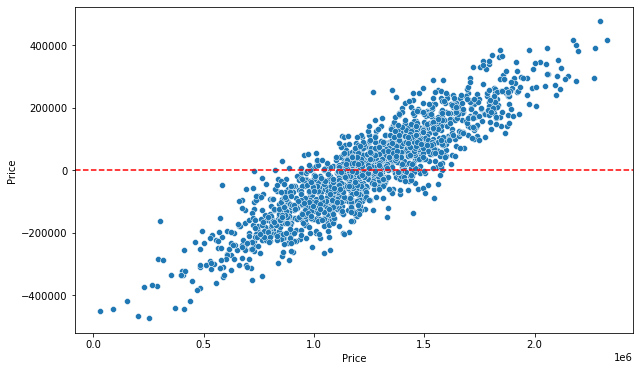

In [233]:
residuals = y_test-y_pred
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

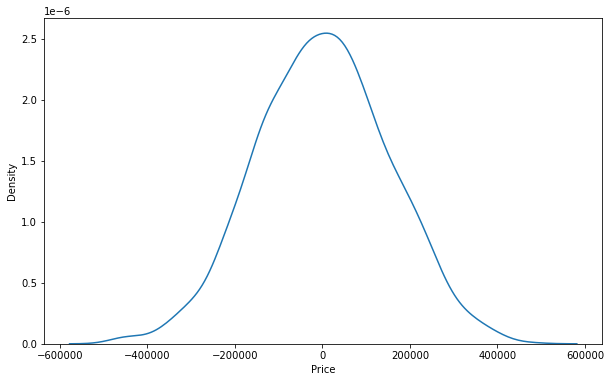

In [234]:
sns.kdeplot(residuals)

In [235]:
import scipy.stats as stats

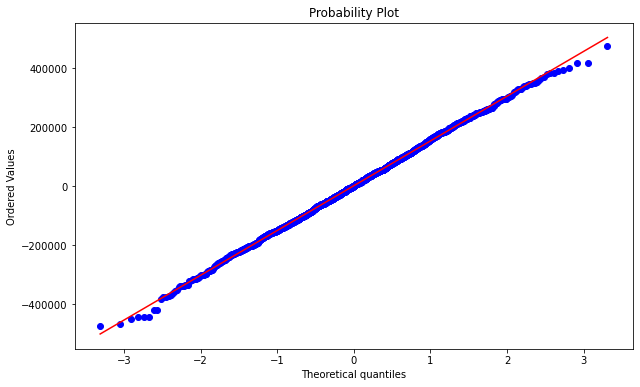

In [236]:
stats.probplot(residuals, dist= "norm", plot = plt);

In [237]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [238]:
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")

Actual        pred    residual
4451  253185.702  725536.790 -472351.089
90    201898.087  668599.279 -466701.193
1271   31140.518  480180.575 -449040.058
1799   88591.770  532792.998 -444201.228
3185  412269.203  856427.713 -444158.510
...          ...         ...         ...
2300 2275455.306 1882903.549  392551.757
990  2185480.091 1785048.474  400431.616
1195 2173808.628 1757544.868  416263.760
924  2330289.701 1912821.973  417467.728
256  2298379.487 1822190.265  476189.221

[1500 rows x 3 columns]

In [239]:
result_sample = comparing.sample(20)
result_sample

Actual        pred    residual
653  1246509.140 1234579.641   11929.499
1958 1662585.938 1431981.375  230604.563
4436 1316206.247 1344411.741  -28205.494
4245  697840.567  931383.273 -233542.706
1377 1311067.446 1399256.840  -88189.394
3489 1202050.584 1199885.067    2165.518
958  1127260.126 1183392.259  -56132.133
2781 1148720.905 1138668.285   10052.620
378  1249092.928 1236307.679   12785.249
2701 1877941.971 1699483.505  178458.467
3405 1210026.031 1297425.690  -87399.658
4024 1332042.912 1310525.625   21517.287
3754 1040762.832 1072849.996  -32087.164
1054 1479758.318 1488828.443   -9070.125
2308  904785.163 1056426.907 -151641.744
2531 1454681.937 1277624.896  177057.041
331   996771.248 1048764.188  -51992.940
2102 1813555.330 1612868.094  200687.236
1799   88591.770  532792.998 -444201.228
4558 1002023.358 1067359.022  -65335.664

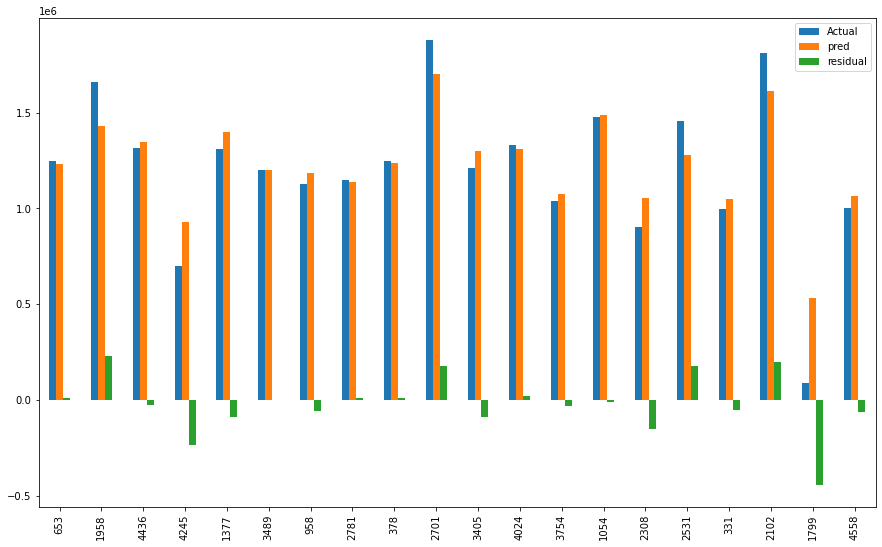

In [240]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

### Model Tuning

In [241]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [242]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, 
                                l1_ratio= [0.1, 0.5, 0.7, 0.9, 0.95, 1], 
                                cv= 10, 
                                max_iter= 100000)

In [243]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [244]:
elastic_cv_model.alpha_

1.0

In [245]:
elastic_cv_model.l1_ratio_

1.0

In [246]:
elastic_cv_model.coef_

array([228968.85757155, 161539.2283956 , 121467.93481601,   1620.57874977,
       151076.03831806])

In [247]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns= ["elastic_coef_(alp: 0.01, l1: 0.95)"])

In [248]:
pd.concat([lm_df, rm_df, rcm_df, lcm_df, em_df, ecm_df], axis= 1)

lm.coef_  ridge_coef_1  Ridge_cv_coef_2.40  lasso_cv_coef_0.01  \
0  228510.977    228902.915          228902.915          228962.641   
1  133536.425    161493.099          161493.099          161533.289   
2  104018.878    121422.871          121422.871          121467.352   
3   38344.069      1642.216            1642.216            1614.555   
4  138984.465    151033.588          151033.588          151069.463   
5   11663.075           NaN                 NaN                 NaN   
6    1544.507           NaN                 NaN                 NaN   
7  -27335.440           NaN                 NaN                 NaN   
8    8042.480           NaN                 NaN                 NaN   
9    9784.586           NaN                 NaN                 NaN   
10  25590.479           NaN                 NaN                 NaN   
11  23498.358           NaN                 NaN                 NaN   
12 -25675.987           NaN                 NaN                 NaN   
13  -5956.271           NaN                 NaN                 NaN   
14  16752.032           NaN                 NaN                 NaN   
15  -6741.257           NaN                 NaN                 NaN   
16  10740.057           NaN                 NaN                 NaN   
17 -11021.613           NaN                 NaN                 NaN   
18  -5805.200           NaN                 NaN                 NaN   
19   4324.617           NaN                 NaN                 NaN   

    elastic_coef_(alp: 1, l1: 0.5)  elastic_coef_(alp: 0.01, l1: 0.95)  
0                       151554.251                          228968.858  
1                       107201.167                          161539.228  
2                        76376.580                          121467.935  
3                        15180.287                            1620.579  
4                       100222.526                          151076.038  
5                              NaN                                 NaN  
6                              NaN                                 NaN  
7                              NaN                                 NaN  
8                              NaN                                 NaN  
9                              NaN                                 NaN  
10                             NaN                                 NaN  
11                             NaN                                 NaN  
12                             NaN                                 NaN  
13                             NaN                                 NaN  
14                             NaN                                 NaN  
15                             NaN                                 NaN  
16                             NaN                                 NaN  
17                             NaN                                 NaN  
18                             NaN                                 NaN  
19                             NaN                                 NaN

In [249]:
y_train_pred = elastic_cv_model.predict(X_train)

In [250]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9177641115281978
MAE 		: 81397.51499957165
MSE 		: 10243864533.460987
RMSE 		: 101211.97821138063


In [251]:
y_pred = elastic_cv_model.predict(X_test)

In [252]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185060955649413
MAE 		: 81257.53812298157
MSE 		: 10169125437.54751
RMSE 		: 100842.08167995894


In [253]:
elastic_cv_scores = {"elastic_cv_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                              "mae": mean_absolute_error(y_train, y_train_pred),
                              "mse": mean_squared_error(y_train, y_train_pred),
                              "R2" : r2_score(y_train, y_train_pred)},
                "elastic_cv_test": {"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                              "mae": mean_absolute_error(y_test, y_pred),
                              "mse": mean_squared_error(y_test, y_pred),
                              "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

elastic_cv_train  elastic_cv_test
rmse        101211.978       100842.082
mae          81397.515        81257.538
mse    10243864533.461  10169125437.548
R2               0.918            0.919

In [254]:
pd.concat([cv, rs, rcs,lss,lcs, es, ecs], axis= 1)

cv_train         cv_test     ridge_train      ridge_test  \
rmse      101211.978      100842.082      101212.027      100840.635   
mae        81397.506       81257.558       81399.616       81255.502   
mse  10243864529.555 10169125565.898 10243874493.907 10168833732.266   
R2             0.918           0.919           0.918           0.919   

      ridge_cv_train   ridge_cv_test     lasso_train      lasso_test  \
rmse      101212.027      100840.635      101211.978      100842.082   
mae        81399.616       81255.502       81397.515       81257.538   
mse  10243874493.907 10168833732.266 10243864533.461 10169125437.548   
R2             0.918           0.919           0.918           0.919   

      lasso_cv_train   lasso_cv_test   elastic_train    elastic_test  \
rmse      101211.979      100842.025      152283.674      151278.660   
mae        81397.624       81257.351      121782.901      121206.270   
mse  10243864736.997 10169113915.546 23190317513.492 22885232933.967   
R2             0.918           0.919           0.814           0.817   

      elastic_cv_train  elastic_cv_test  
rmse        101211.978       100842.082  
mae          81397.515        81257.538  
mse    10243864533.461  10169125437.548  
R2               0.918            0.919

### GridSearch

In [255]:
from sklearn.model_selection import GridSearchCV

In [256]:
elastic_model = ElasticNet(max_iter = 10000)

In [257]:
param_grid = {"alpha": [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
             "l1_ratio": [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [258]:
grid_model = GridSearchCV(estimator= elastic_model, param_grid= param_grid, 
                          scoring = "neg_root_mean_squared_error", 
                          cv= 10, 
                          verbose= 1)

import warnings
warnings.filterwarnings("ignore")

In [259]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [260]:
grid_model.best_params_

{'alpha': 0.02, 'l1_ratio': 0.99}

In [261]:
pd.DataFrame(grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.002         0.000            0.001           0.000       0.010   
1           0.002         0.001            0.000           0.000       0.010   
2           0.002         0.001            0.001           0.001       0.010   
3           0.002         0.001            0.000           0.000       0.010   
4           0.002         0.001            0.001           0.000       0.010   
5           0.002         0.001            0.001           0.000       0.010   
6           0.002         0.000            0.000           0.000       0.010   
7           0.002         0.000            0.000           0.000       0.020   
8           0.002         0.001            0.001           0.000       0.020   
9           0.002         0.000            0.000           0.000       0.020   
10          0.002         0.001            0.000           0.000       0.020   
11          0.002         0.000            0.001           0.000       0.020   
12          0.002         0.000            0.001           0.001       0.020   
13          0.001         0.000            0.000           0.000       0.020   
14          0.001         0.000            0.001           0.000       0.100   
15          0.001         0.000            0.000           0.000       0.100   
16          0.001         0.000            0.001           0.000       0.100   
17          0.002         0.001            0.001           0.000       0.100   
18          0.002         0.001            0.000           0.000       0.100   
19          0.001         0.000            0.000           0.000       0.100   
20          0.002         0.000            0.001           0.000       0.100   
21          0.001         0.000            0.001           0.000           1   
22          0.001         0.000            0.000           0.000           1   
23          0.001         0.000            0.000           0.000           1   
24          0.001         0.000            0.001           0.001           1   
25          0.001         0.000            0.000           0.000           1   
26          0.001         0.000            0.001           0.000           1   
27          0.001         0.000            0.001           0.000           1   
28          0.001         0.000            0.001           0.001           5   
29          0.001         0.000            0.001           0.000           5   
30          0.002         0.000            0.001           0.001           5   
31          0.002         0.000            0.000           0.000           5   
32          0.001         0.000            0.001           0.000           5   
33          0.001         0.000            0.001           0.000           5   
34          0.001         0.000            0.001           0.000           5   
35          0.001         0.000            0.000           0.000          10   
36          0.001         0.000            0.001           0.000          10   
37          0.001         0.000            0.000           0.000          10   
38          0.001         0.000            0.001           0.000          10   
39          0.001         0.000            0.001           0.000          10   
40          0.001         0.000            0.000           0.000          10   
41          0.001         0.000            0.000           0.000          10   
42          0.001         0.000            0.000           0.000          50   
43          0.001         0.000            0.000           0.000          50   
44          0.001         0.000            0.000           0.000          50   
45          0.001         0.000            0.000           0.000          50   
46          0.001         0.000            0.000           0.000          50   
47          0.001         0.000            0.000           0.000          50   
48          0.001         0.000            0.000           0.000          50   
49  

### Using Best Model From GridSearch

In [262]:
y_pred = grid_model.predict(X_test)

In [263]:
eval_metrics(y_test, y_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9185077477835689
MAE 		: 81256.11896935917
MSE 		: 10168919267.299679
RMSE 		: 100841.05943166047


In [264]:
y_train_pred = grid_model.predict(X_train)

In [265]:
eval_metrics(y_train, y_train_pred)

Model Performance: 
---------------------------
R2_score 	: 0.9177640723384625
MAE 		: 81398.97126022371
MSE 		: 10243869415.202364
RMSE 		: 101212.00232779887


In [266]:
grid_model.best_params_

{'alpha': 0.02, 'l1_ratio': 0.99}

In [267]:
pd.concat([cv, rs, rcs,lss,lcs, es, ecs], axis= 1).T

rmse        mae             mse    R2
cv_train         101211.978  81397.506 10243864529.555 0.918
cv_test          100842.082  81257.558 10169125565.898 0.919
ridge_train      101212.027  81399.616 10243874493.907 0.918
ridge_test       100840.635  81255.502 10168833732.266 0.919
ridge_cv_train   101212.027  81399.616 10243874493.907 0.918
ridge_cv_test    100840.635  81255.502 10168833732.266 0.919
lasso_train      101211.978  81397.515 10243864533.461 0.918
lasso_test       100842.082  81257.538 10169125437.548 0.919
lasso_cv_train   101211.979  81397.624 10243864736.997 0.918
lasso_cv_test    100842.025  81257.351 10169113915.546 0.919
elastic_train    152283.674 121782.901 23190317513.492 0.814
elastic_test     151278.660 121206.270 22885232933.967 0.817
elastic_cv_train 101211.978  81397.515 10243864533.461 0.918
elastic_cv_test  100842.082  81257.538 10169125437.548 0.919

## Conclusion